<a href="https://colab.research.google.com/github/pduyn308/fuzzy-logic/blob/main/fuzzy_logic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 9.8 MB/s eta 0:00:00


21.25


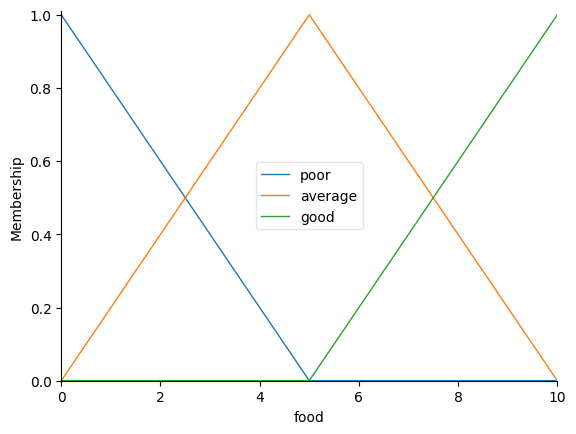

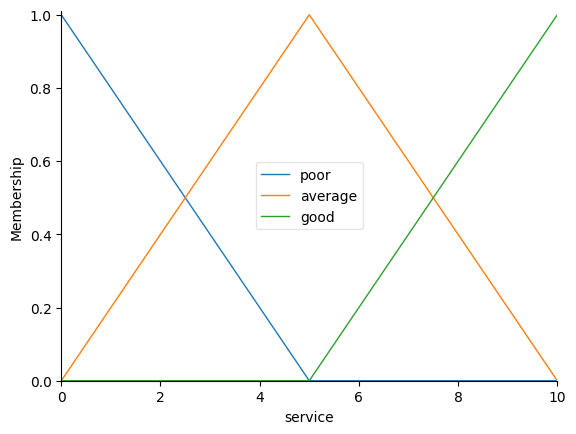

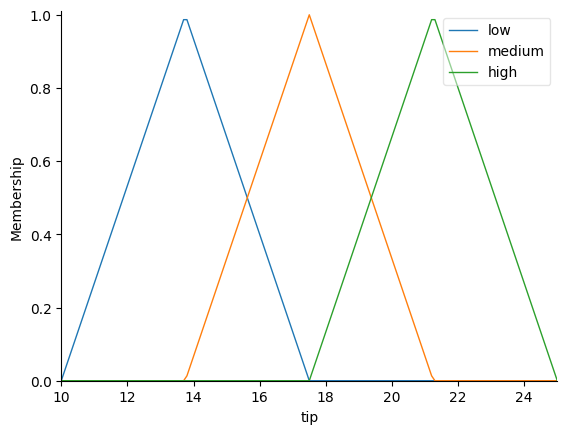

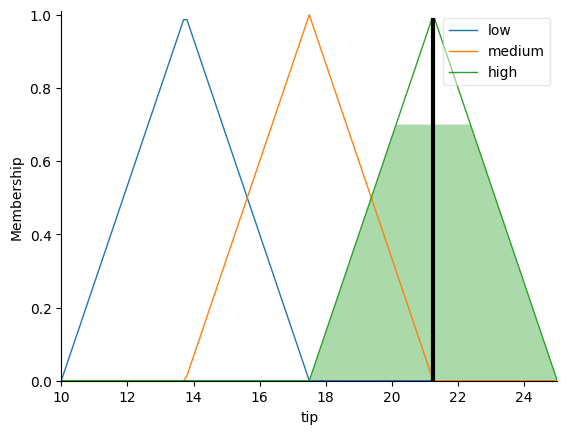

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
food=ctrl.Antecedent(np.arange(0, 10.1, 0.1), 'food')
service=ctrl.Antecedent(np.arange(0, 10.1, 0.1), 'service')
tip=ctrl.Consequent(np.arange(10, 25.1, 0.1), 'tip')
food['poor']=fuzz.trimf(food.universe, [0, 0, 5])
food['average']=fuzz.trimf(food.universe, [0, 5, 10])
food['good']=fuzz.trimf(food.universe, [5, 10, 10])
service['poor']=fuzz.trimf(service.universe, [0, 0, 5])
service['average']=fuzz.trimf(service.universe, [0, 5, 10])
service['good']=fuzz.trimf(service.universe, [5, 10, 10])
tip['low']=fuzz.trimf(tip.universe, [10, 13.75, 17.5])
tip['medium']=fuzz.trimf(tip.universe, [13.75, 17.5, 21.25])
tip['high']=fuzz.trimf(tip.universe, [17.5, 21.25, 25])
food.view()
service.view()
tip.view()

rule1=ctrl.Rule(food['poor'] & service['poor'], tip['low'])
rule2=ctrl.Rule(food['poor'] & service['average'], tip['low'])
rule3=ctrl.Rule(food['poor'] & service['good'], tip['medium'])
rule4=ctrl.Rule(food['average'] & service['poor'], tip['low'])
rule5=ctrl.Rule(food['average'] & service['average'], tip['medium'])
rule6=ctrl.Rule(food['average'] & service['good'], tip['high'])
rule7=ctrl.Rule(food['good'] & service['poor'], tip['medium'])
rule8=ctrl.Rule(food['good'] & service['average'], tip['high'])
rule9=ctrl.Rule(food['good'] & service['good'], tip['high'])

#mô phỏng và điều khiển
tipping_ctrl=ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])
tipping=ctrl.ControlSystemSimulation(tipping_ctrl)
#đánh giá và kiểm tra lại
tipping.input['food']=6.5
tipping.input['service']=10
#xác định giá trị điều khiển
tipping.compute()
print(tipping.output['tip'])
tip.view(sim=tipping)

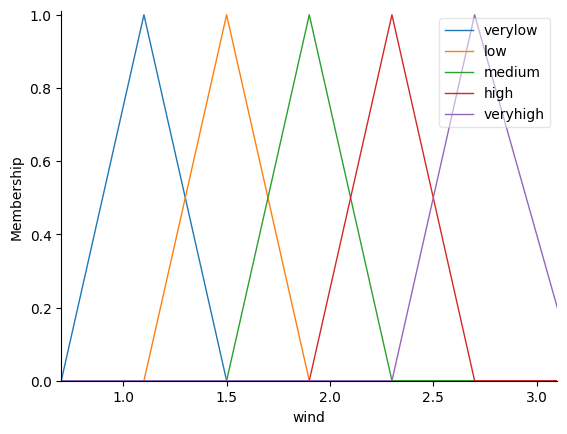

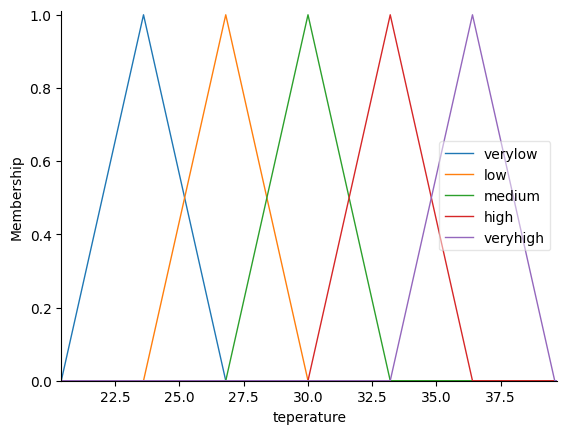

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

wind=ctrl.Antecedent(np.arange(0.7, 3.2, 0.1), 'wind')
temperature=ctrl.Antecedent(np.arange(20.4, 39.7, 0.1), 'teperature')
rainfall=ctrl.Consequent(np.arange(0.2, 9.2, 0.1), 'rainfall')

wind['verylow']=fuzz.trimf(wind.universe, [0.7, 1.1, 1.5])
wind['low']=fuzz.trimf(wind.universe, [1.1, 1.5, 1.9])
wind['medium']=fuzz.trimf(wind.universe, [1.5, 1.9, 2.3])
wind['high']=fuzz.trimf(wind.universe, [1.9, 2.3, 2.7])
wind['veryhigh']=fuzz.trimf(wind.universe, [2.3, 2.7, 3.2])
temperature['verylow']=fuzz.trimf(temperature.universe, [20.4, 23.6, 26.8])
temperature['low']=fuzz.trimf(temperature.universe, [23.6, 26.8, 30])
temperature['medium']=fuzz.trimf(temperature.universe, [26.8, 30, 33.2])
temperature['high']=fuzz.trimf(temperature.universe, [30, 33.2, 36.4])
temperature['veryhigh']=fuzz.trimf(temperature.universe, [33.2, 36.4, 39.6])
rainfall['verylow']=fuzz.trimf(rainfall.universe, [0.2, 1.7, 3.2])
rainfall['low']=fuzz.trimf(rainfall.universe, [1.7, 3.2, 4.7])
rainfall['medium']=fuzz.trimf(rainfall.universe, [3.2, 4.7, 6.2])
rainfall['high']=fuzz.trimf(rainfall.universe, [4.7, 6.2, 7.7])
rainfall['veryhigh']=fuzz.trimf(rainfall.universe, [6.2, 7.7, 9.2])

wind.view()
temperature.view()

2.7500000000000004


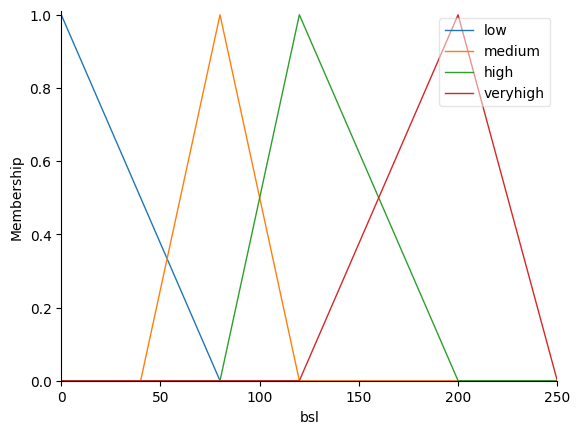

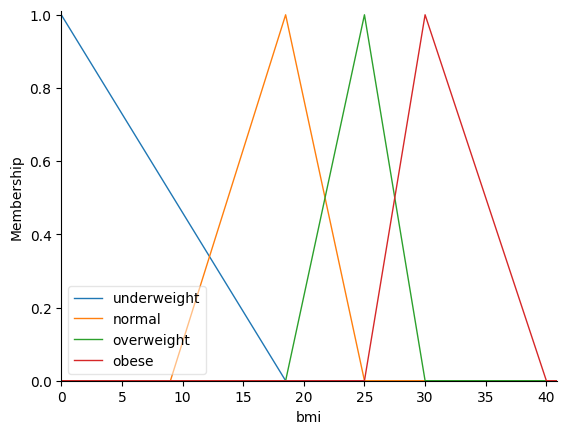

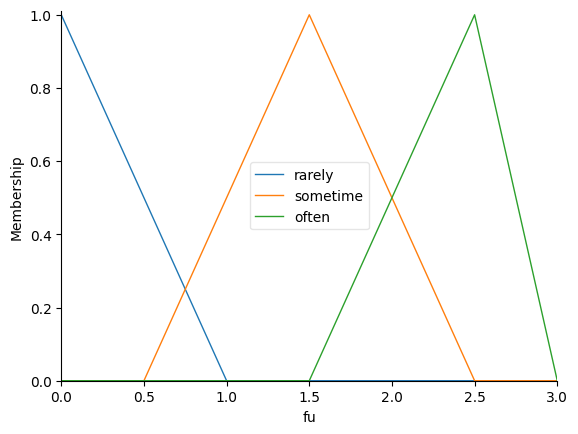

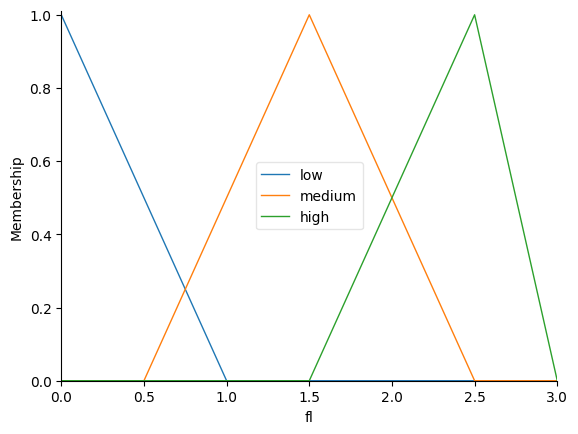

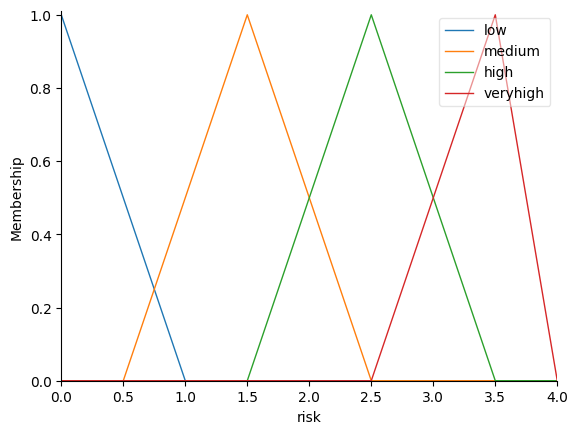

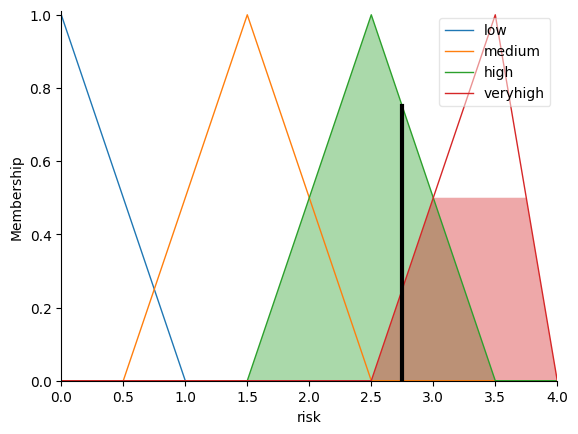

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

bsl=ctrl.Antecedent(np.arange(0, 251, 5), 'bsl')
bmi=ctrl.Antecedent(np.arange(0, 41, 0.1), 'bmi')
fu=ctrl.Antecedent(np.arange(0, 3.1, 0.5), 'fu')
fl=ctrl.Antecedent(np.arange(0, 3.1, 0.5), 'fl')
risk=ctrl.Consequent(np.arange(0, 4.1, 0.5), 'risk')

bsl['low']=fuzz.trimf(bsl.universe, [0, 0, 80])
bsl['medium']=fuzz.trimf(bsl.universe, [40, 80, 120])
bsl['high']=fuzz.trimf(bsl.universe, [80, 120, 200])
bsl['veryhigh']=fuzz.trimf(bsl.universe, [120, 200, 250])
bmi['underweight']=fuzz.trimf(bmi.universe, [0, 0, 18.5])
bmi['normal']=fuzz.trimf(bmi.universe, [9, 18.5, 25])
bmi['overweight']=fuzz.trimf(bmi.universe, [18.5, 25, 30])
bmi['obese']=fuzz.trimf(bmi.universe, [25, 30, 40 ])
fu['rarely']=fuzz.trimf(fu.universe, [0, 0, 1])
fu['sometime']=fuzz.trimf(fu.universe, [0.5, 1.5, 2.5])
fu['often']=fuzz.trimf(fu.universe, [1.5, 2.5, 3])
fl['low']=fuzz.trimf(fl.universe, [0, 0, 1])
fl['medium']=fuzz.trimf(fl.universe, [0.5, 1.5, 2.5])
fl['high']=fuzz.trimf(fl.universe, [1.5, 2.5, 3])
risk['low']=fuzz.trimf(risk.universe, [0, 0, 1])
risk['medium']=fuzz.trimf(risk.universe, [0.5, 1.5, 2.5])
risk['high']=fuzz.trimf(risk.universe, [1.5, 2.5, 3.5])
risk['veryhigh']=fuzz.trimf(risk.universe, [2.5, 3.5, 4])

bsl.view()
bmi.view()
fu.view()
fl.view()
risk.view()

rule1=ctrl.Rule(bsl['veryhigh'] & fu['often'], risk['veryhigh'])
rule2=ctrl.Rule(bsl['veryhigh'] & fu['sometime'], risk['high'])
rule3=ctrl.Rule(bsl['high'] & fu['often'], risk['high'])
rule4=ctrl.Rule(bsl['medium'] & fu['rarely'], risk['low'])
rule5=ctrl.Rule(bsl['veryhigh'] & bmi['obese'], risk['veryhigh'])
rule6=ctrl.Rule(bsl['veryhigh'] & bmi['overweight'], risk['high'])
rule7=ctrl.Rule(bsl['high'] & bmi['overweight'], risk['high'])
rule8=ctrl.Rule(bsl['high'] & bmi['normal'], risk['low'])
rule9=ctrl.Rule(bsl['medium'] & bmi['normal'], risk['low'])
rule10=ctrl.Rule(bsl['veryhigh'] & fl['high'], risk['veryhigh'])
rule11=ctrl.Rule(bsl['high'] & fl['high'], risk['high'])
rule12=ctrl.Rule(bsl['high'] & fl['medium'], risk['medium'])
rule13=ctrl.Rule(bsl['medium'] & fl['low'], risk['low'])

diabetes_risk_ctrl=ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13])
diabetes_risk=ctrl.ControlSystemSimulation(diabetes_risk_ctrl)
diabetes_risk.input['bsl']=200
diabetes_risk.input['bmi']=25
diabetes_risk.input['fu']=2
diabetes_risk.input['fl']=1
diabetes_risk.compute()
print(diabetes_risk.output['risk'])
risk.view(sim=diabetes_risk)

2.4999999999999996


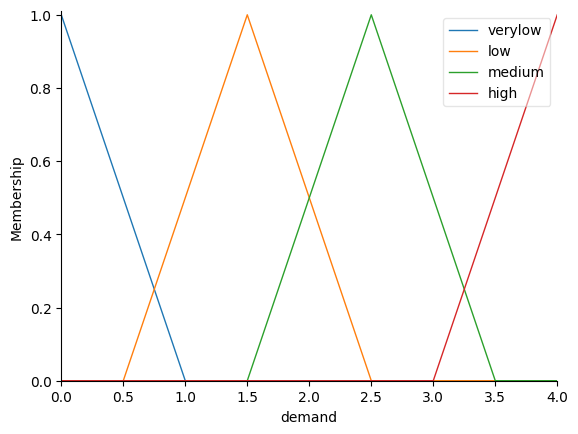

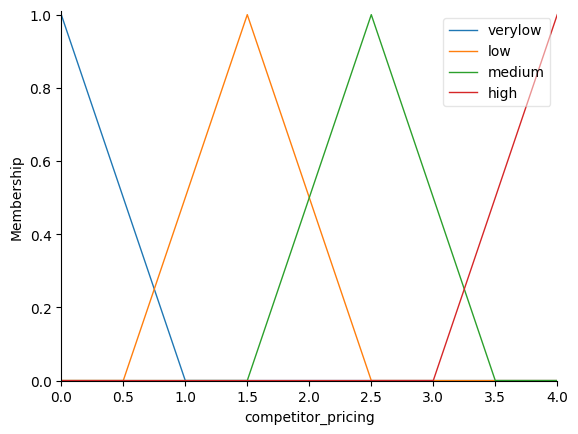

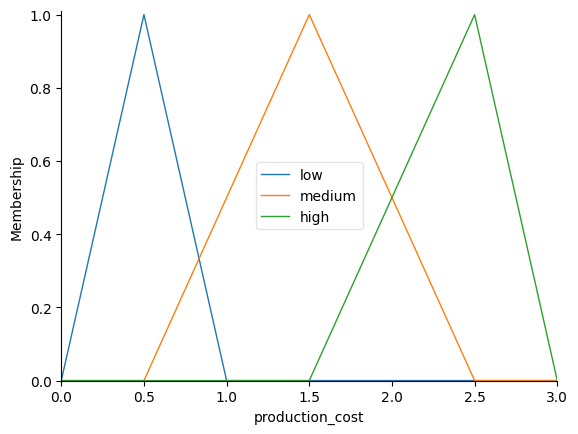

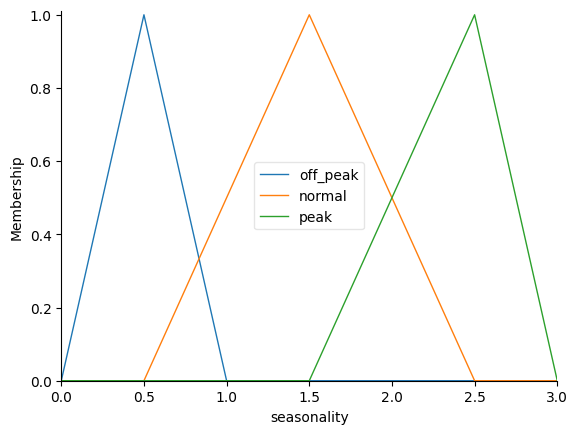

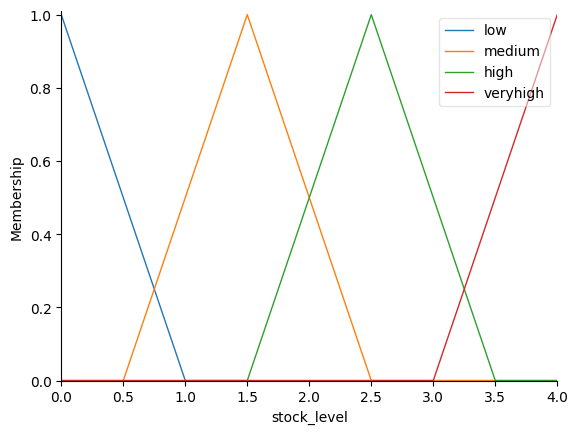

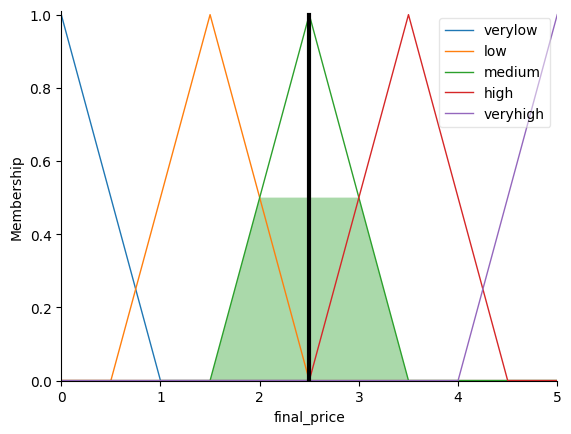

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

demand=ctrl.Antecedent(np.arange(0, 4.1, 0.5), 'demand')
competitor_pricing=ctrl.Antecedent(np.arange(0, 4.1, 0.5), 'competitor_pricing')
production_cost=ctrl.Antecedent(np.arange(0, 3.1, 0.5), 'production_cost')
seasonality=ctrl.Antecedent(np.arange(0, 3.1, 0.5), 'seasonality')
stock_level=ctrl.Antecedent(np.arange(0, 4.1, 0.5), 'stock_level')
final_price=ctrl.Consequent(np.arange(0, 5.1, 0.5), 'final_price')

demand['verylow']=fuzz.trimf(demand.universe, [0, 0, 1])
demand['low']=fuzz.trimf(demand.universe, [0.5, 1.5, 2.5])
demand['medium']=fuzz.trimf(demand.universe, [1.5, 2.5, 3.5])
demand['high']=fuzz.trimf(demand.universe, [3, 4, 4])
competitor_pricing['verylow']=fuzz.trimf(competitor_pricing.universe, [0, 0, 1])
competitor_pricing['low']=fuzz.trimf(competitor_pricing.universe, [0.5, 1.5, 2.5])
competitor_pricing['medium']=fuzz.trimf(competitor_pricing.universe, [1.5, 2.5, 3.5])
competitor_pricing['high']=fuzz.trimf(competitor_pricing.universe, [3, 4, 4])
production_cost['low']=fuzz.trimf(production_cost.universe, [0, 0.5, 1])
production_cost['medium']=fuzz.trimf(production_cost.universe, [0.5, 1.5, 2.5])
production_cost['high']=fuzz.trimf(production_cost.universe, [1.5, 2.5, 3])
seasonality['off_peak']=fuzz.trimf(seasonality.universe, [0, 0.5, 1])
seasonality['normal']=fuzz.trimf(seasonality.universe, [0.5, 1.5, 2.5])
seasonality['peak']=fuzz.trimf(seasonality.universe, [1.5, 2.5, 3])
stock_level['low']=fuzz.trimf(stock_level.universe, [0, 0, 1])
stock_level['medium']=fuzz.trimf(stock_level.universe, [0.5, 1.5, 2.5])
stock_level['high']=fuzz.trimf(stock_level.universe, [1.5, 2.5, 3.5])
stock_level['veryhigh']=fuzz.trimf(stock_level.universe, [3, 4, 4])
final_price['verylow']=fuzz.trimf(final_price.universe, [0, 0, 1])
final_price['low']=fuzz.trimf(final_price.universe, [0.5, 1.5, 2.5])
final_price['medium']=fuzz.trimf(final_price.universe, [1.5, 2.5, 3.5])
final_price['high']=fuzz.trimf(final_price.universe, [2.5, 3.5, 4.5])
final_price['veryhigh']=fuzz.trimf(final_price.universe, [4, 5, 5])

demand.view()
competitor_pricing.view()
production_cost.view()
seasonality.view()
stock_level.view()

rule1=ctrl.Rule(demand['high'] & competitor_pricing['high'] & stock_level['low'], final_price['veryhigh'])
rule2=ctrl.Rule(demand['high'] & seasonality['peak'] & stock_level['low'], final_price['veryhigh'])
rule3=ctrl.Rule(demand['medium'] & production_cost['high'] & stock_level['low'], final_price['veryhigh'])

rule4=ctrl.Rule(demand['high'] & competitor_pricing['medium'] & stock_level['medium'], final_price['high'])
rule5=ctrl.Rule(demand['medium'] & competitor_pricing['high'] & stock_level['low'], final_price['high'])
rule6=ctrl.Rule(demand['high'] & seasonality['peak'] & stock_level['medium'], final_price['high'])

rule7=ctrl.Rule(demand['medium'] & competitor_pricing['medium'] & stock_level['medium'], final_price['medium'])
rule8=ctrl.Rule(demand['low'] & competitor_pricing['high'] & stock_level['medium'], final_price['medium'])
rule9=ctrl.Rule(demand['medium'] & production_cost['medium'] & stock_level['medium'], final_price['medium'])

rule10=ctrl.Rule(demand['low'] & competitor_pricing['low'] & stock_level['high'], final_price['low'])
rule11=ctrl.Rule(demand['low'] & seasonality['off_peak'] & stock_level['high'], final_price['low'])
rule12=ctrl.Rule(demand['medium'] & production_cost['low'] & stock_level['high'], final_price['low'])

rule13=ctrl.Rule(demand['low'] & competitor_pricing['low'] & stock_level['veryhigh'], final_price['verylow'])
rule14=ctrl.Rule(demand['verylow'] & seasonality['off_peak'] & stock_level['veryhigh'], final_price['verylow'])
rule15=ctrl.Rule(demand['medium'] & production_cost['low'] & stock_level['veryhigh'], final_price['verylow'])

final_price_ctrl=ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13, rule14, rule15])
final_price_sim=ctrl.ControlSystemSimulation(final_price_ctrl)
final_price_sim.input['demand']=2
final_price_sim.input['competitor_pricing']=3
final_price_sim.input['production_cost']=2
final_price_sim.input['seasonality']=2
final_price_sim.input['stock_level']=2
final_price_sim.compute()
print(final_price_sim.output['final_price'])
final_price.view(sim=final_price_sim)

130.0
95.0


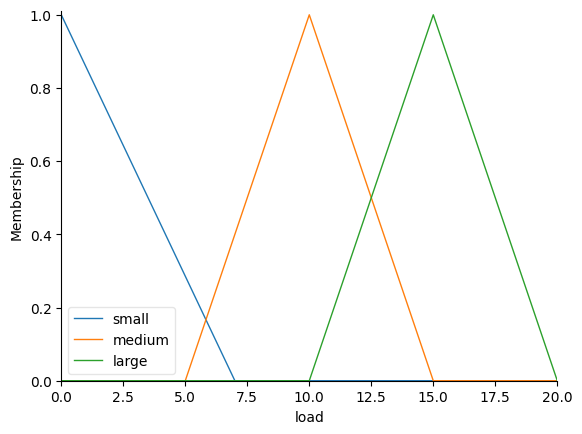

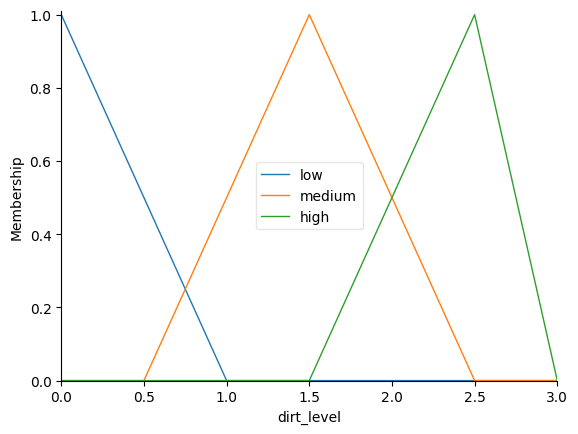

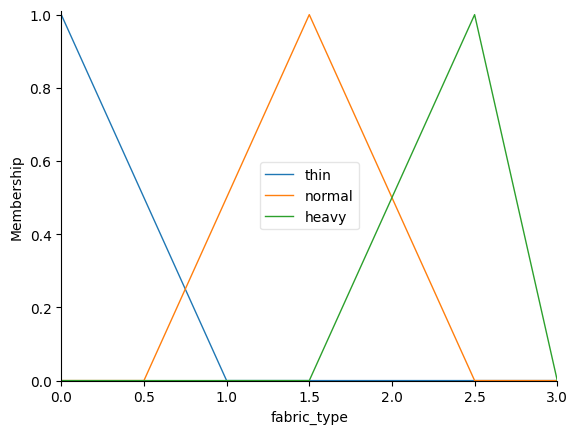

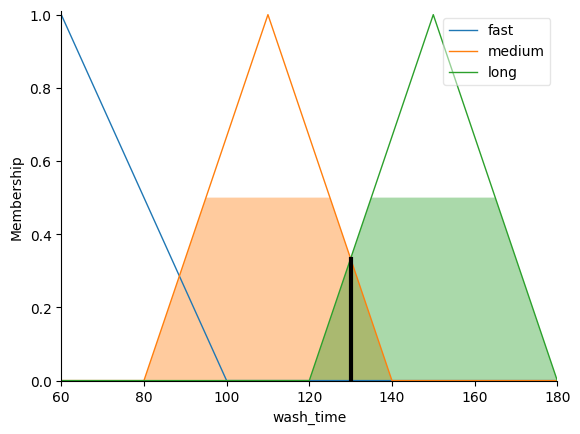

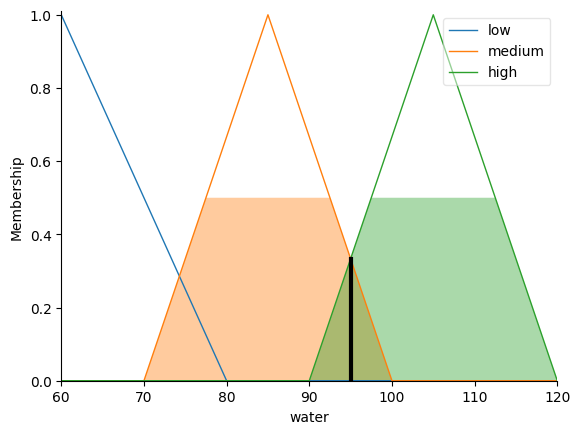

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

load=ctrl.Antecedent(np.arange(0, 21, 1), 'load')
dirt_level=ctrl.Antecedent(np.arange(0, 3.1, 0.5), 'dirt_level')
fabric_type=ctrl.Antecedent(np.arange(0, 3.1, 0.5), 'fabric_type')
wash_time=ctrl.Consequent(np.arange(60, 181, 5), 'wash_time')
water=ctrl.Consequent(np.arange(60, 121, 5), 'water')

load['small']=fuzz.trimf(load.universe, [0, 0, 7])
load['medium']=fuzz.trimf(load.universe, [5, 10, 15])
load['large']=fuzz.trimf(load.universe, [10, 15, 20])
dirt_level['low']=fuzz.trimf(dirt_level.universe, [0, 0, 1])
dirt_level['medium']=fuzz.trimf(dirt_level.universe, [0.5, 1.5, 2.5])
dirt_level['high']=fuzz.trimf(dirt_level.universe, [1.5, 2.5, 3])
fabric_type['thin']=fuzz.trimf(fabric_type.universe, [0, 0, 1])
fabric_type['normal']=fuzz.trimf(fabric_type.universe, [0.5, 1.5, 2.5])
fabric_type['heavy']=fuzz.trimf(fabric_type.universe, [1.5, 2.5, 3])
wash_time['fast']=fuzz.trimf(wash_time.universe, [60, 60, 100])
wash_time['medium']=fuzz.trimf(wash_time.universe, [80, 110, 140])
wash_time['long']=fuzz.trimf(wash_time.universe, [120, 150, 180])
water['low']=fuzz.trimf(water.universe, [60, 60, 80])
water['medium']=fuzz.trimf(water.universe, [70, 85, 100])
water['high']=fuzz.trimf(water.universe, [90, 105, 120])

load.view()
dirt_level.view()
fabric_type.view()

rule1=ctrl.Rule(load['small'] & dirt_level['low'], (wash_time['fast'], water['low']))
rule2=ctrl.Rule(load['small'] & dirt_level['medium'], (wash_time['medium'], water['medium']))
rule3=ctrl.Rule(load['small'] & dirt_level['high'], (wash_time['long'], water['medium']))
rule4=ctrl.Rule(load['medium'] & dirt_level['low'], (wash_time['medium'], water['medium']))
rule5=ctrl.Rule(load['medium'] & dirt_level['medium'], (wash_time['long'], water['medium']))
rule6=ctrl.Rule(load['medium'] & dirt_level['high'], (wash_time['long'], water['high']))
rule7=ctrl.Rule(load['large'] & dirt_level['low'], (wash_time['medium'], water['high']))
rule8=ctrl.Rule(load['large'] & dirt_level['medium'], (wash_time['long'], water['high']))
rule9=ctrl.Rule(load['large'] & dirt_level['high'], (wash_time['long'], water['high']))
rule10=ctrl.Rule(fabric_type['thin'], (wash_time['fast'], water['low']))
rule11=ctrl.Rule(fabric_type['normal'], (wash_time['medium'], water['medium']))
rule12=ctrl.Rule(fabric_type['heavy'], (wash_time['long'], water['high']))
rule13=ctrl.Rule(load['large'] & dirt_level['high'] & fabric_type['heavy'], (wash_time['long'], water['high']))
rule14=ctrl.Rule(load['medium'] & dirt_level['medium'] & fabric_type['thin'], (wash_time['fast'], water['low']))
rule15=ctrl.Rule(load['small'] & dirt_level['low'] & fabric_type['normal'], (wash_time['medium'], water['medium']))

washing_machine_ctrl=ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13, rule14, rule15])
washing_machine=ctrl.ControlSystemSimulation(washing_machine_ctrl)
washing_machine.input['load']=2
washing_machine.input['dirt_level']=1
washing_machine.input['fabric_type']=2
washing_machine.compute()
print(washing_machine.output['wash_time'])
print(washing_machine.output['water'])
wash_time.view(sim=washing_machine)
water.view(sim=washing_machine)

67.09280445316162
1.8345347313237224


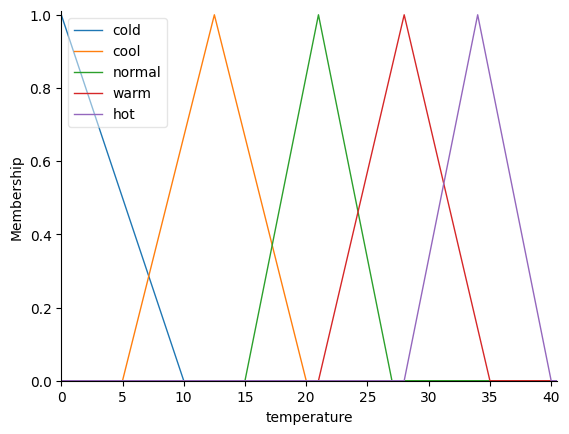

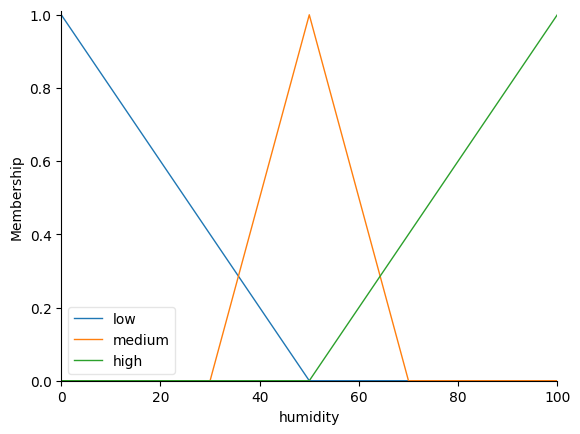

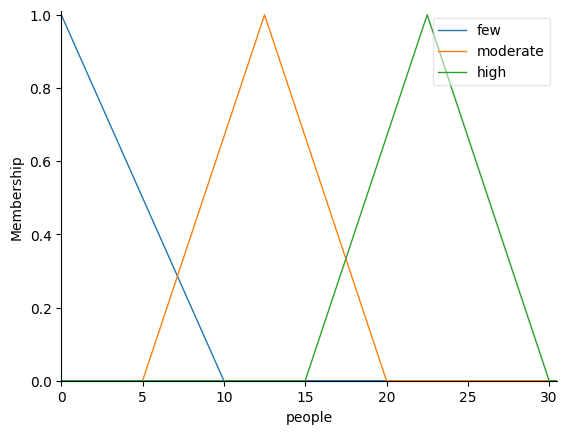

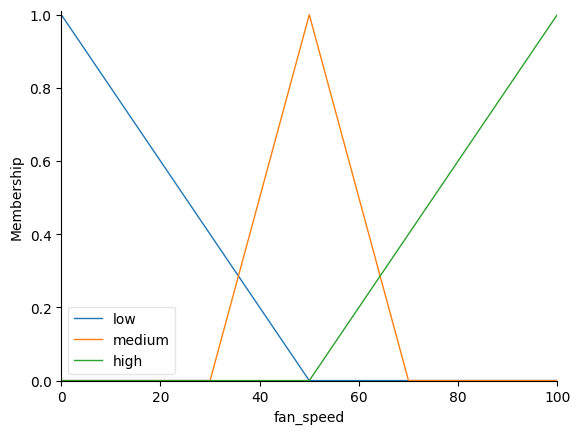

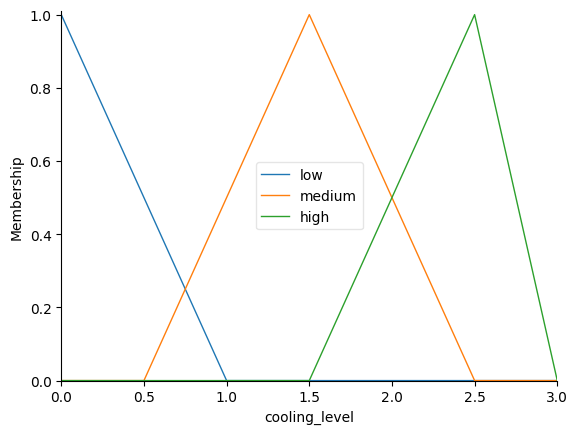

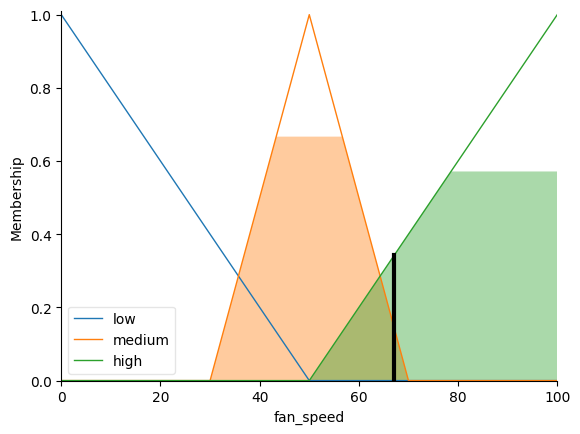

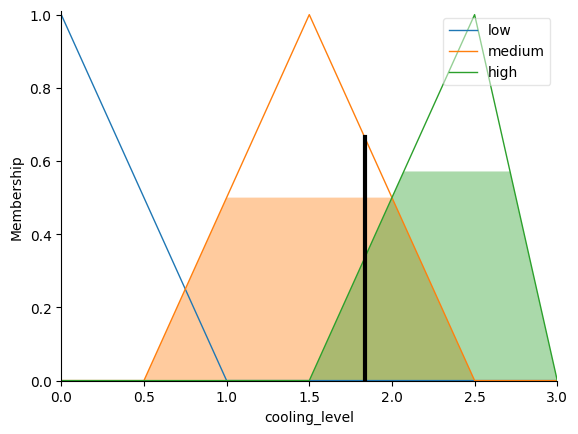

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

temperature=ctrl.Antecedent(np.arange(0, 41, 0.5), 'temperature')
humidity=ctrl.Antecedent(np.arange(0, 101, 1), 'humidity')
people=ctrl.Antecedent(np.arange(0, 31, 0.5), 'people')
fan_speed=ctrl.Consequent(np.arange(0, 101, 1), 'fan_speed')
cooling_level=ctrl.Consequent(np.arange(0, 3.1, 0.5), 'cooling_level')

temperature['cold']=fuzz.trimf(temperature.universe, [0, 0, 10])
temperature['cool']=fuzz.trimf(temperature.universe, [5, 12.5, 20])
temperature['normal']=fuzz.trimf(temperature.universe, [15, 21, 27])
temperature['warm']=fuzz.trimf(temperature.universe, [21, 28, 35])
temperature['hot']=fuzz.trimf(temperature.universe, [28, 34, 40])
humidity['low']=fuzz.trimf(humidity.universe, [0, 0, 50])
humidity['medium']=fuzz.trimf(humidity.universe, [30, 50, 70])
humidity['high']=fuzz.trimf(humidity.universe, [50, 100, 100])
people['few']=fuzz.trimf(people.universe, [0, 0, 10])
people['moderate']=fuzz.trimf(people.universe, [5, 12.5, 20])
people['high']=fuzz.trimf(people.universe, [15, 22.5, 30])
fan_speed['low']=fuzz.trimf(fan_speed.universe, [0, 0, 50])
fan_speed['medium']=fuzz.trimf(fan_speed.universe, [30, 50, 70])
fan_speed['high']=fuzz.trimf(fan_speed.universe, [50, 100, 100])
cooling_level['low']=fuzz.trimf(cooling_level.universe, [0, 0, 1])
cooling_level['medium']=fuzz.trimf(cooling_level.universe, [0.5, 1.5, 2.5])
cooling_level['high']=fuzz.trimf(cooling_level.universe, [1.5, 2.5, 3])

temperature.view()
humidity.view()
people.view()
fan_speed.view()
cooling_level.view()

rule1=ctrl.Rule(temperature['cold'], fan_speed['low'])
rule2=ctrl.Rule(temperature['cool'], fan_speed['low'])
rule3=ctrl.Rule(temperature['normal'], fan_speed['medium'])
rule4=ctrl.Rule(temperature['warm'], fan_speed['high'])
rule5=ctrl.Rule(temperature['hot'], fan_speed['high'])

rule6=ctrl.Rule(temperature['cold'], cooling_level['low'])
rule7=ctrl.Rule(temperature['cool'], cooling_level['low'])
rule8=ctrl.Rule(temperature['normal'], cooling_level['medium'])
rule9=ctrl.Rule(temperature['warm'], cooling_level['high'])
rule10=ctrl.Rule(temperature['hot'], cooling_level['high'])

rule11=ctrl.Rule(humidity['low'], cooling_level['low'])
rule12=ctrl.Rule(humidity['medium'], cooling_level['medium'])
rule13=ctrl.Rule(humidity['high'], cooling_level['high'])

rule14=ctrl.Rule(people['few'], fan_speed['low'])
rule15=ctrl.Rule(people['moderate'], fan_speed['medium'])
rule16=ctrl.Rule(people['high'], fan_speed['high'])

rule17=ctrl.Rule(temperature['hot'] & humidity['high'] & people['high'], (fan_speed['high'], cooling_level['high']))
rule18=ctrl.Rule(temperature['normal'] & humidity['medium'] & people['moderate'], (fan_speed['medium'], cooling_level['medium']))
rule19=ctrl.Rule(temperature['cool'] & humidity['low'] & people['few'], (fan_speed['low'], cooling_level['low']))

fan_speed_ctrl=ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13, rule14, rule15, rule16, rule17, rule18, rule19])
fan_speed_sim=ctrl.ControlSystemSimulation(fan_speed_ctrl)
fan_speed_sim.input['temperature']=25
fan_speed_sim.input['humidity']=60
fan_speed_sim.input['people']=15
fan_speed_sim.compute()
print(fan_speed_sim.output['fan_speed'])
print(fan_speed_sim.output['cooling_level'])
fan_speed.view(sim=fan_speed_sim)
cooling_level.view(sim=fan_speed_sim)

1.4145299145299146
0.5


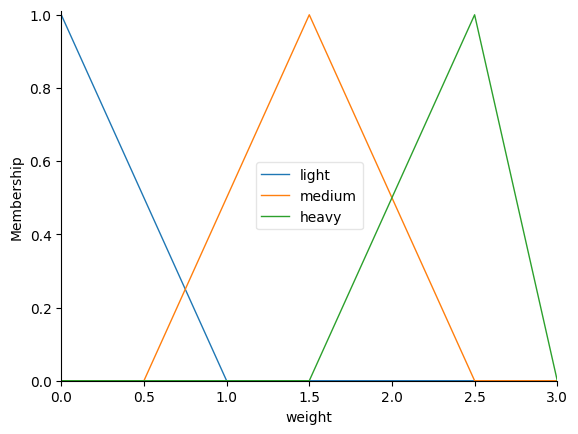

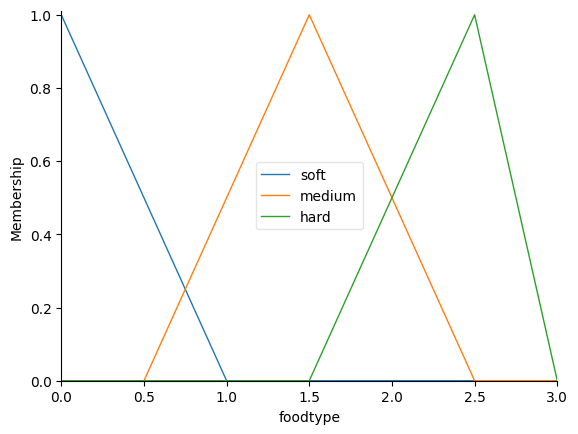

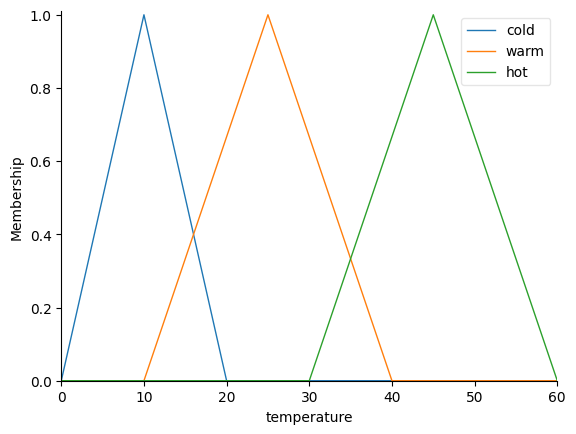

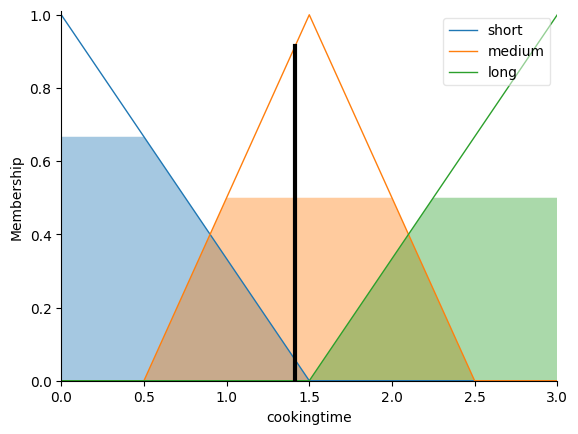

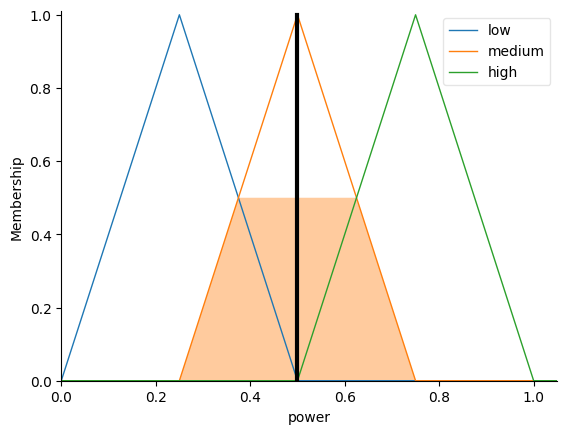

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

foodweight=ctrl.Antecedent(np.arange(0, 3.1, 0.5), 'weight')
foodtype=ctrl.Antecedent(np.arange(0, 3.1, 0.5), 'foodtype')
foodtemperature=ctrl.Antecedent(np.arange(0, 61, 5), 'temperature')
cookingtime=ctrl.Consequent(np.arange(0, 3.1, 0.5), 'cookingtime')
power=ctrl.Consequent(np.arange(0, 1.1, 0.05), 'power')

foodweight['light']=fuzz.trimf(foodweight.universe, [0, 0, 1])
foodweight['medium']=fuzz.trimf(foodweight.universe, [0.5, 1.5, 2.5])
foodweight['heavy']=fuzz.trimf(foodweight.universe, [1.5, 2.5, 3])
foodtype['soft']=fuzz.trimf(foodtype.universe, [0, 0, 1])
foodtype['medium']=fuzz.trimf(foodtype.universe, [0.5, 1.5, 2.5])
foodtype['hard']=fuzz.trimf(foodtype.universe, [1.5, 2.5, 3])
foodtemperature['cold']=fuzz.trimf(foodtemperature.universe, [0, 10, 20])
foodtemperature['warm']=fuzz.trimf(foodtemperature.universe, [10, 25, 40])
foodtemperature['hot']=fuzz.trimf(foodtemperature.universe, [30, 45, 60])
cookingtime['short']=fuzz.trimf(cookingtime.universe, [0, 0, 1.5])
cookingtime['medium']=fuzz.trimf(cookingtime.universe, [0.5, 1.5, 2.5])
cookingtime['long']=fuzz.trimf(cookingtime.universe, [1.5, 3, 3])
power['low']=fuzz.trimf(power.universe, [0, 0.25, 0.5])
power['medium']=fuzz.trimf(power.universe, [0.25, 0.5, 0.75])
power['high']=fuzz.trimf(power.universe, [0.5, 0.75, 1])

foodweight.view()
foodtype.view()
foodtemperature.view()

rule1=ctrl.Rule(foodweight['light'], cookingtime['short'])
rule2=ctrl.Rule(foodweight['medium'], cookingtime['medium'])
rule3=ctrl.Rule(foodweight['heavy'], cookingtime['long'])
rule4=ctrl.Rule(foodtype['soft'], power['low'])
rule5=ctrl.Rule(foodtype['medium'], power['medium'])
rule6=ctrl.Rule(foodtype['hard'], power['high'])
rule7=ctrl.Rule(foodtemperature['cold'], cookingtime['long'])
rule8=ctrl.Rule(foodtemperature['warm'], cookingtime['medium'])
rule9=ctrl.Rule(foodtemperature['hot'], cookingtime['short'])
rule10=ctrl.Rule(foodweight['heavy'] & foodtype['hard'] & foodtemperature['cold'], (cookingtime['long'], power['high']))
rule11=ctrl.Rule(foodweight['medium'] & foodtype['soft'] & foodtemperature['warm'], (cookingtime['medium'], power['medium']))
rule12=ctrl.Rule(foodweight['light'] & foodtype['medium'] & foodtemperature['hot'], (cookingtime['short'], power['low']))

cooking_time_ctrl=ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12])
cooking_time=ctrl.ControlSystemSimulation(cooking_time_ctrl)
cooking_time.input['weight']=2
cooking_time.input['foodtype']=1
cooking_time.input['temperature']=40
cooking_time.compute()
print(cooking_time.output['cookingtime'])
print(cooking_time.output['power'])
cookingtime.view(sim=cooking_time)
power.view(sim=cooking_time)

2.0
0.6250000000000001


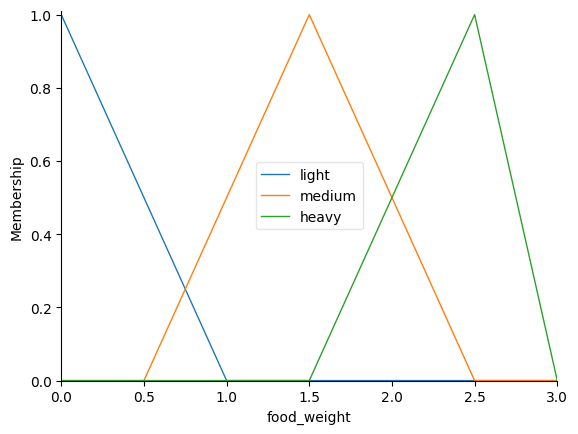

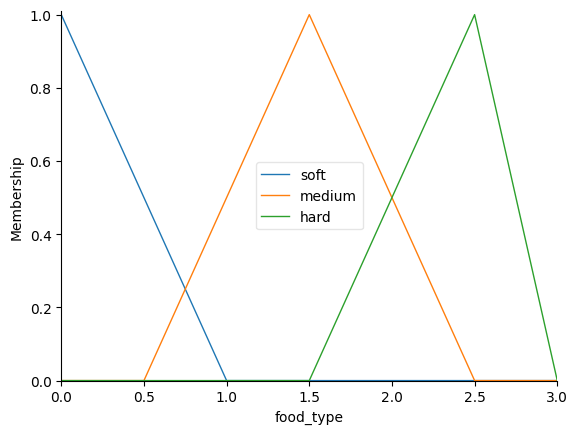

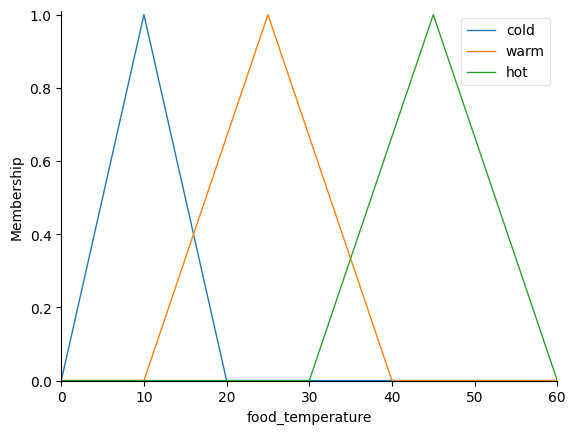

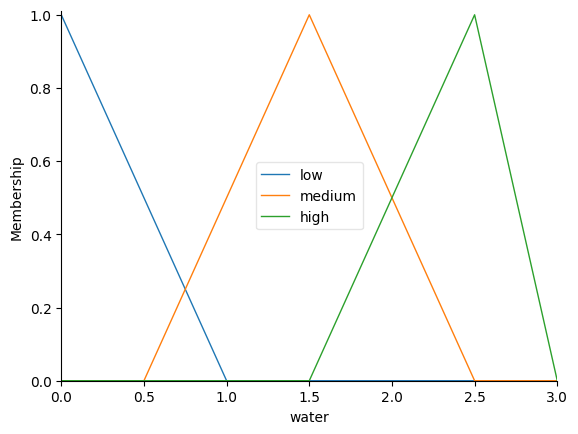

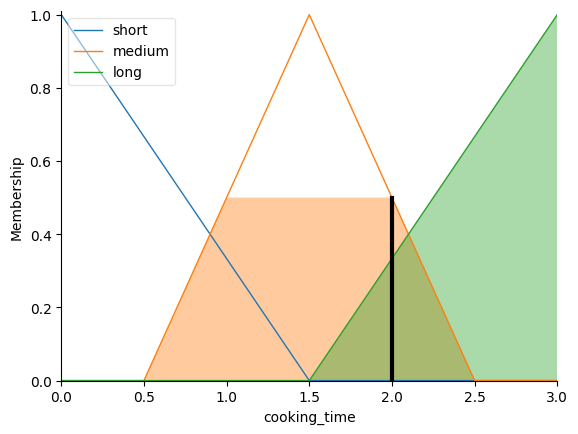

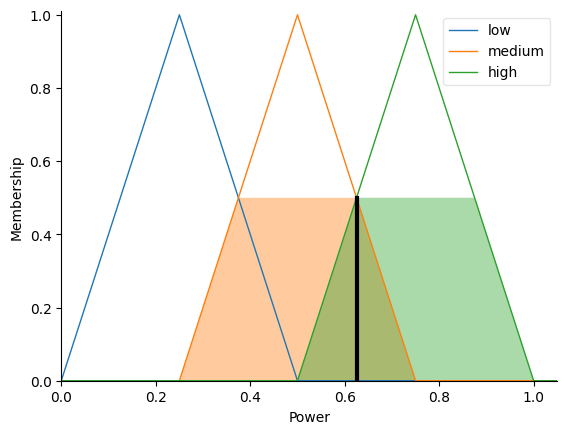

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

food_weight=ctrl.Antecedent(np.arange(0, 3.1, 0.5), 'food_weight')
food_type=ctrl.Antecedent(np.arange(0, 3.1, 0.5), 'food_type')
food_temperature=ctrl.Antecedent(np.arange(0, 61, 5), 'food_temperature')
water=ctrl.Antecedent(np.arange(0, 3.1, 0.5), 'water')
cooking_time=ctrl.Consequent(np.arange(0, 3.1, 0.5), 'cooking_time')
Power=ctrl.Consequent(np.arange(0, 1.1, 0.05), 'Power')

food_weight['light']=fuzz.trimf(food_weight.universe, [0, 0, 1])
food_weight['medium']=fuzz.trimf(food_weight.universe, [0.5, 1.5, 2.5])
food_weight['heavy']=fuzz.trimf(food_weight.universe, [1.5, 2.5, 3])
food_type['soft']=fuzz.trimf(food_type.universe, [0, 0, 1])
food_type['medium']=fuzz.trimf(food_type.universe, [0.5, 1.5, 2.5])
food_type['hard']=fuzz.trimf(food_type.universe, [1.5, 2.5, 3])
food_temperature['cold']=fuzz.trimf(food_temperature.universe, [0, 10, 20])
food_temperature['warm']=fuzz.trimf(food_temperature.universe, [10, 25, 40])
food_temperature['hot']=fuzz.trimf(food_temperature.universe, [30, 45, 60])
water['low']=fuzz.trimf(water.universe, [0, 0, 1])
water['medium']=fuzz.trimf(water.universe, [0.5, 1.5, 2.5])
water['high']=fuzz.trimf(water.universe, [1.5, 2.5, 3])
cooking_time['short']=fuzz.trimf(cooking_time.universe, [0, 0, 1.5])
cooking_time['medium']=fuzz.trimf(cooking_time.universe, [0.5, 1.5, 2.5])
cooking_time['long']=fuzz.trimf(cooking_time.universe, [1.5, 3, 3])
Power['low']=fuzz.trimf(Power.universe, [0, 0.25, 0.5])
Power['medium']=fuzz.trimf(Power.universe, [0.25, 0.5, 0.75])
Power['high']=fuzz.trimf(Power.universe, [0.5, 0.75, 1])

food_weight.view()
food_type.view()
food_temperature.view()
water.view()

rule1=ctrl.Rule(food_weight['light'], cooking_time['short'])
rule2=ctrl.Rule(food_weight['medium'], cooking_time['medium'])
rule3=ctrl.Rule(food_weight['heavy'], cooking_time['long'])
rule4=ctrl.Rule(food_type['soft'], Power['low'])
rule5=ctrl.Rule(food_type['medium'], Power['medium'])
rule6=ctrl.Rule(food_type['hard'], Power['high'])
rule7=ctrl.Rule(food_temperature['cold'], cooking_time['long'])
rule8=ctrl.Rule(food_temperature['warm'], cooking_time['medium'])
rule9=ctrl.Rule(food_temperature['hot'], cooking_time['short'])
rule10=ctrl.Rule(food_weight['heavy'] & food_type['hard'] & food_temperature['cold'], (cooking_time['long'], Power['high']))
rule11=ctrl.Rule(food_weight['medium'] & food_type['soft'] & food_temperature['warm'], (cooking_time['medium'], Power['medium']))
rule12=ctrl.Rule(food_weight['light'] & food_type['medium'] & food_temperature['hot'], (cooking_time['short'], Power['low']))
rule13=ctrl.Rule(water['low'], Power['low'])
rule14=ctrl.Rule(water['medium'], Power['medium'])
rule15=ctrl.Rule(water['high'], Power['high'])

time_ctrl=ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13, rule14, rule15])
time=ctrl.ControlSystemSimulation(time_ctrl)
time.input['food_weight']=2
time.input['food_type']=3
time.input['food_temperature']=10
time.input['water']=2
time.compute()
print(time.output['cooking_time'])
print(time.output['Power'])
cooking_time.view(sim=time)
Power.view(sim=time)

1.2499999999999998
1.4999999999999998
1.4999999999999998


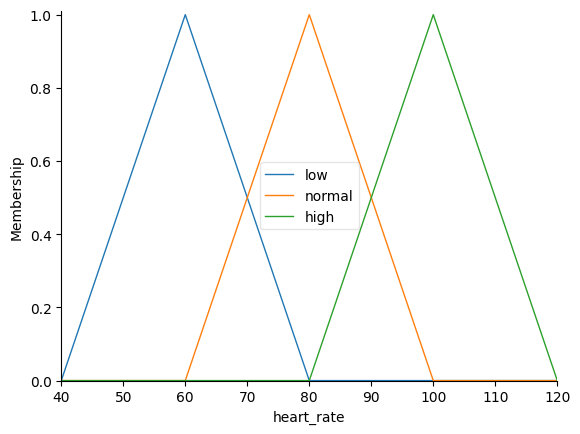

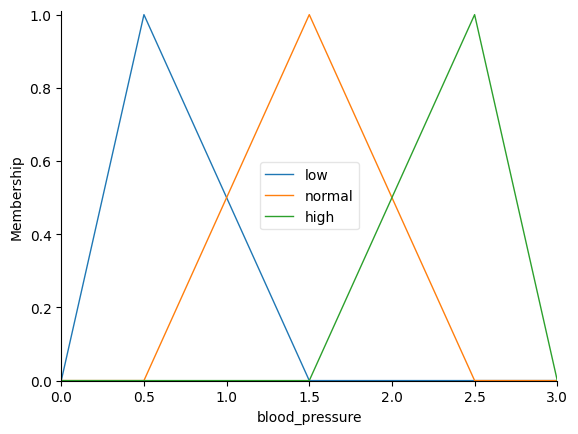

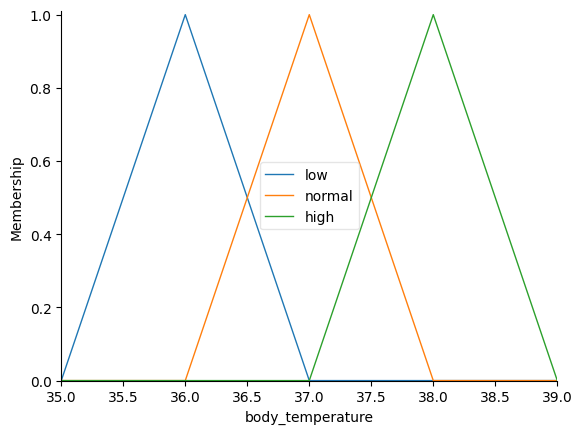

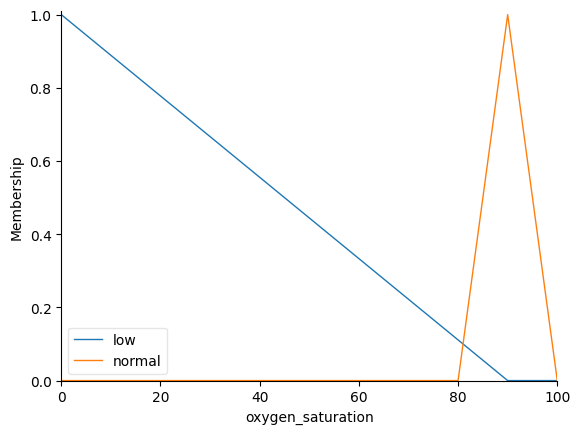

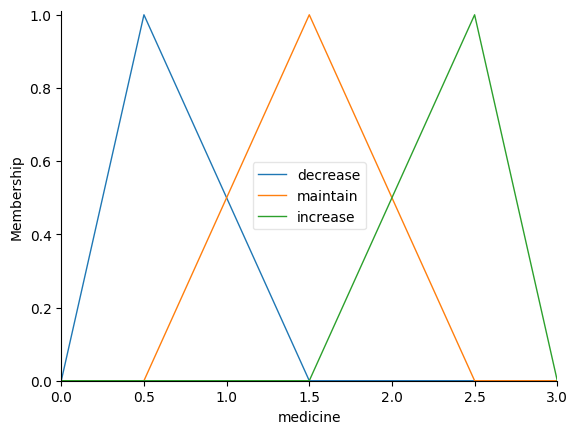

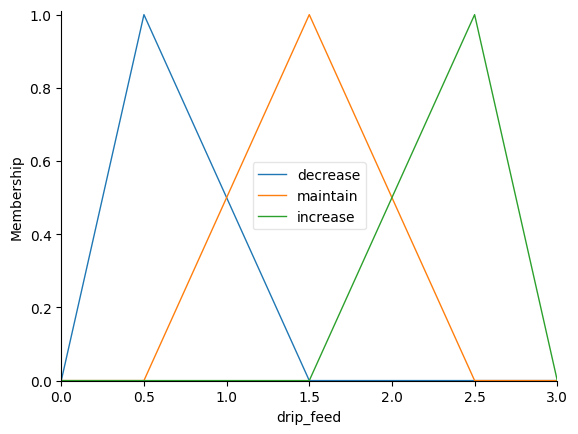

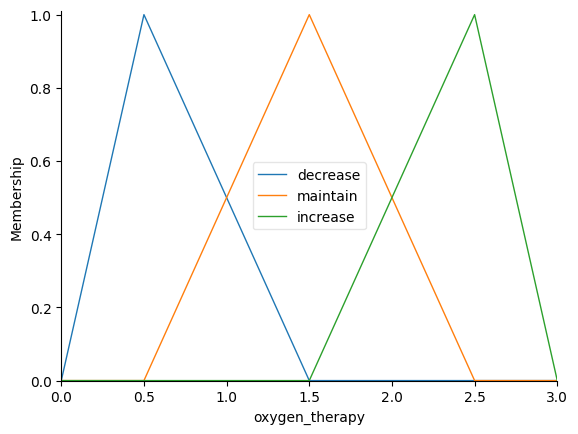

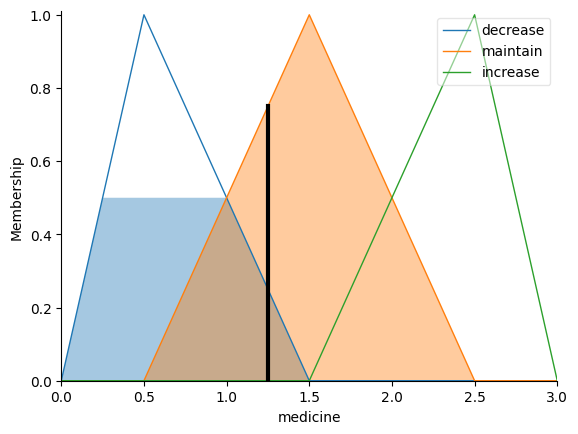

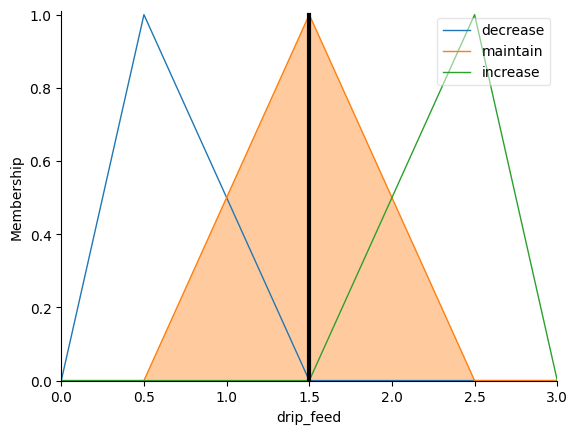

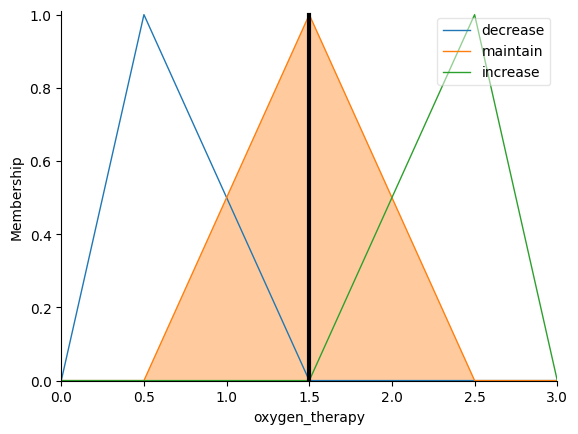

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

heart_rate=ctrl.Antecedent(np.arange(40, 121, 1), 'heart_rate')
blood_pressure=ctrl.Antecedent(np.arange(0, 3.1, 0.5), 'blood_pressure')
body_temperature=ctrl.Antecedent(np.arange(35, 40, 1), 'body_temperature')
oxygen_saturation=ctrl.Antecedent(np.arange(0, 101, 1), 'oxygen_saturation')
blood_sugar_level=ctrl.Antecedent(np.arange(50, 200, 1), 'blood_sugar_level')
medicine=ctrl.Consequent(np.arange(0, 3.1, 0.5), 'medicine')
drip_feed=ctrl.Consequent(np.arange(0, 3.1, 0.5), 'drip_feed')
oxygen_therapy=ctrl.Consequent(np.arange(0, 3.1, 0.5), 'oxygen_therapy')

heart_rate['low']=fuzz.trimf(heart_rate.universe, [40, 60, 80])
heart_rate['normal']=fuzz.trimf(heart_rate.universe, [60, 80, 100])
heart_rate['high']=fuzz.trimf(heart_rate.universe, [80, 100, 120])
blood_pressure['low']=fuzz.trimf(blood_pressure.universe, [0, 0.5, 1.5])
blood_pressure['normal']=fuzz.trimf(blood_pressure.universe, [0.5, 1.5, 2.5])
blood_pressure['high']=fuzz.trimf(blood_pressure.universe, [1.5, 2.5, 3])
blood_sugar_level['low']=fuzz.trimf(blood_sugar_level.universe, [50, 60, 70])
blood_sugar_level['normal']=fuzz.trimf(blood_sugar_level.universe, [60, 100, 140])
blood_sugar_level['high']=fuzz.trimf(blood_sugar_level.universe, [140, 160, 200])
body_temperature['low']=fuzz.trimf(body_temperature.universe, [35, 36, 37])
body_temperature['normal']=fuzz.trimf(body_temperature.universe, [36, 37, 38])
body_temperature['high']=fuzz.trimf(body_temperature.universe, [37, 38, 39])
oxygen_saturation['low']=fuzz.trimf(oxygen_saturation.universe, [0, 0, 90])
oxygen_saturation['normal']=fuzz.trimf(oxygen_saturation.universe, [80, 90, 100])
medicine['decrease']=fuzz.trimf(medicine.universe, [0, 0.5, 1.5])
medicine['maintain']=fuzz.trimf(medicine.universe, [0.5, 1.5, 2.5])
medicine['increase']=fuzz.trimf(medicine.universe, [1.5, 2.5, 3])
drip_feed['decrease']=fuzz.trimf(drip_feed.universe, [0, 0.5, 1.5])
drip_feed['maintain']=fuzz.trimf(drip_feed.universe, [0.5, 1.5, 2.5])
drip_feed['increase']=fuzz.trimf(drip_feed.universe, [1.5, 2.5, 3])
oxygen_therapy['decrease']=fuzz.trimf(oxygen_therapy.universe, [0, 0.5, 1.5])
oxygen_therapy['maintain']=fuzz.trimf(oxygen_therapy.universe, [0.5, 1.5, 2.5])
oxygen_therapy['increase']=fuzz.trimf(oxygen_therapy.universe, [1.5, 2.5, 3])

heart_rate.view()
blood_pressure.view()
body_temperature.view()
oxygen_saturation.view()
medicine.view()
drip_feed.view()
oxygen_therapy.view()

rule1=ctrl.Rule(heart_rate['low'] & blood_pressure['low'], (medicine['increase'], drip_feed['increase']))
rule2=ctrl.Rule(heart_rate['high'] & blood_pressure['high'], medicine['decrease'])
rule3=ctrl.Rule(heart_rate['normal'] & blood_pressure['normal'], medicine['maintain'])
rule4=ctrl.Rule(body_temperature['high'] & oxygen_saturation['low'], (oxygen_therapy['increase'], medicine['increase']))
rule5=ctrl.Rule(body_temperature['normal'] & oxygen_saturation['normal'], (oxygen_therapy['maintain'], medicine['maintain'], drip_feed['maintain']))
rule6=ctrl.Rule(body_temperature['low'] & oxygen_saturation['low'], oxygen_therapy['increase'])
rule7=ctrl.Rule(blood_sugar_level['high'], medicine['increase'])
rule8=ctrl.Rule(blood_sugar_level['low'], medicine['decrease'])
rule9=ctrl.Rule(blood_sugar_level['normal'], medicine['maintain'])
rule10=ctrl.Rule(blood_pressure['high'] & blood_sugar_level['high'] & heart_rate['high'], medicine['decrease'])
rule11=ctrl.Rule(blood_pressure['low'] & oxygen_saturation['low'] & heart_rate['low'], (medicine['increase'], drip_feed['increase'], oxygen_therapy['increase']))
rule12=ctrl.Rule(body_temperature['high'] & blood_pressure['high'] & oxygen_saturation['normal'], (medicine['increase'], oxygen_therapy['maintain']))

therapeutic_ctrl=ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12])
therapeutic_sim=ctrl.ControlSystemSimulation(therapeutic_ctrl)
therapeutic_sim.input['heart_rate']=100
therapeutic_sim.input['blood_pressure']=2
therapeutic_sim.input['body_temperature']=37
therapeutic_sim.input['oxygen_saturation']=90
therapeutic_sim.input['blood_sugar_level']=100
therapeutic_sim.compute()
print(therapeutic_sim.output['medicine'])
print(therapeutic_sim.output['drip_feed'])
print(therapeutic_sim.output['oxygen_therapy'])
medicine.view(sim=therapeutic_sim)
drip_feed.view(sim=therapeutic_sim)
oxygen_therapy.view(sim=therapeutic_sim)

1.5


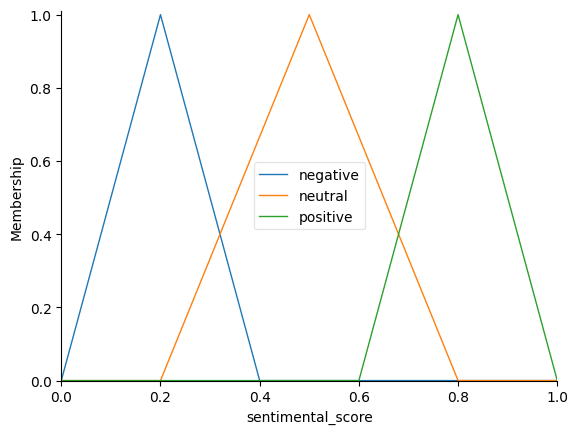

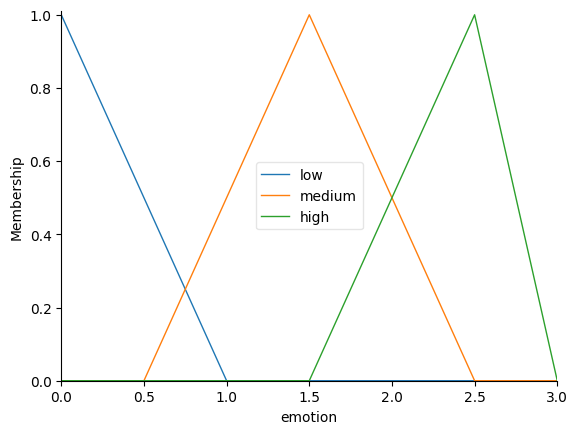

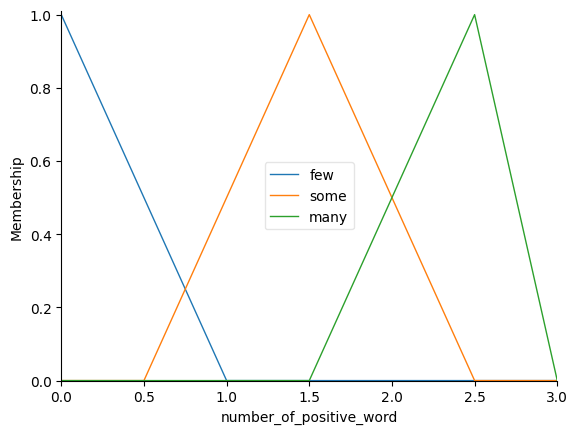

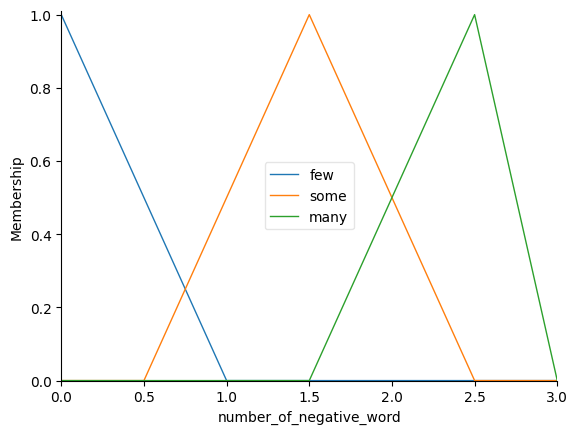

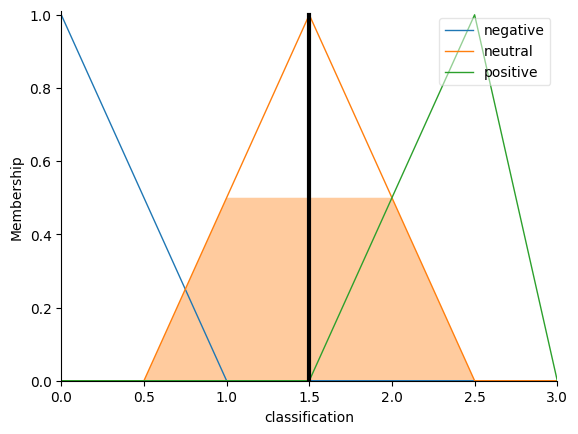

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

sentimental_score=ctrl.Antecedent(np.arange(0, 1.1, 0.1), 'sentimental_score')
emotion=ctrl.Antecedent(np.arange(0, 3.1, 0.5), 'emotion')
number_of_positive_word=ctrl.Antecedent(np.arange(0, 3.1, 0.5), 'number_of_positive_word')
number_of_negative_word=ctrl.Antecedent(np.arange(0, 3.1, 0.5), 'number_of_negative_word')
classification=ctrl.Consequent(np.arange(0, 3.1, 0.5), 'classification')

sentimental_score['negative']=fuzz.trimf(sentimental_score.universe, [0, 0.2, 0.4])
sentimental_score['neutral']=fuzz.trimf(sentimental_score.universe, [0.2, 0.5, 0.8])
sentimental_score['positive']=fuzz.trimf(sentimental_score.universe, [0.6, 0.8, 1])
emotion['low']=fuzz.trimf(emotion.universe, [0, 0, 1])
emotion['medium']=fuzz.trimf(emotion.universe, [0.5, 1.5, 2.5])
emotion['high']=fuzz.trimf(emotion.universe, [1.5, 2.5, 3])
number_of_positive_word['few']=fuzz.trimf(number_of_positive_word.universe, [0, 0, 1])
number_of_positive_word['some']=fuzz.trimf(number_of_positive_word.universe, [0.5, 1.5, 2.5])
number_of_positive_word['many']=fuzz.trimf(number_of_positive_word.universe, [1.5, 2.5, 3])
number_of_negative_word['few']=fuzz.trimf(number_of_negative_word.universe, [0, 0, 1])
number_of_negative_word['some']=fuzz.trimf(number_of_negative_word.universe, [0.5, 1.5, 2.5])
number_of_negative_word['many']=fuzz.trimf(number_of_negative_word.universe, [1.5, 2.5, 3])
classification['negative']=fuzz.trimf(classification.universe, [0, 0, 1])
classification['neutral']=fuzz.trimf(classification.universe, [0.5, 1.5, 2.5])
classification['positive']=fuzz.trimf(classification.universe, [1.5, 2.5, 3])

sentimental_score.view()
emotion.view()
number_of_positive_word.view()
number_of_negative_word.view()

rule1=ctrl.Rule(sentimental_score['negative'] & emotion['high'], classification['negative'])
rule2=ctrl.Rule(sentimental_score['negative'] & emotion['low'], classification['neutral'])
rule3=ctrl.Rule(sentimental_score['neutral'] & emotion['medium'], classification['neutral'])
rule4=ctrl.Rule(sentimental_score['positive'] & emotion['high'], classification['positive'])

rule5=ctrl.Rule(number_of_positive_word['many'] & number_of_negative_word['few'], classification['positive'])
rule6=ctrl.Rule(number_of_positive_word['few'] & number_of_negative_word['many'], classification['negative'])
rule7=ctrl.Rule(number_of_positive_word['some'] & number_of_negative_word['some'], classification['neutral'])

rule8=ctrl.Rule(sentimental_score['negative'] & number_of_positive_word['many'] & emotion['high'], classification['negative'])
rule9=ctrl.Rule(sentimental_score['neutral'] & number_of_positive_word['some'] & emotion['medium'], classification['neutral'])
rule10=ctrl.Rule(sentimental_score['positive'] & number_of_positive_word['few'] & emotion['high'], classification['positive'])

classification_ctrl=ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10])
classification_sim=ctrl.ControlSystemSimulation(classification_ctrl)
classification_sim.input['sentimental_score']=0.5
classification_sim.input['emotion']=2
classification_sim.input['number_of_positive_word']=2
classification_sim.input['number_of_negative_word']=1
classification_sim.compute()
print(classification_sim.output['classification'])
classification.view(sim=classification_sim)

Thời gian dự kiến: 30.00000000000001
Tiền thưởng: 38.519999999999996
Đánh giá: 3.0000000000000004


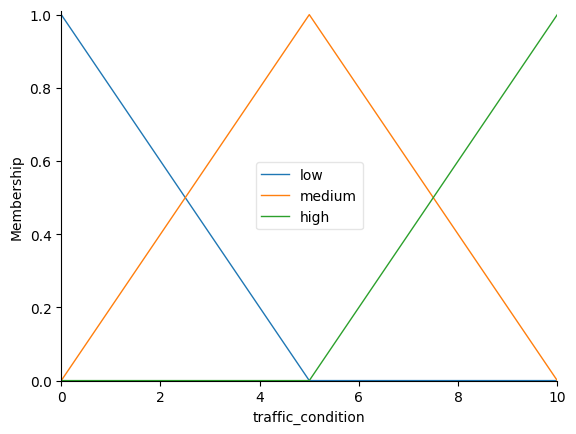

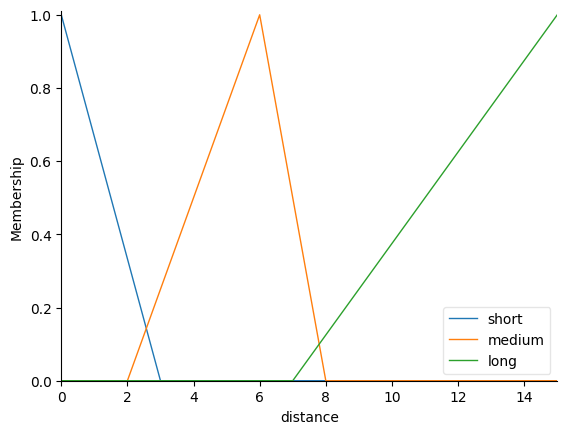

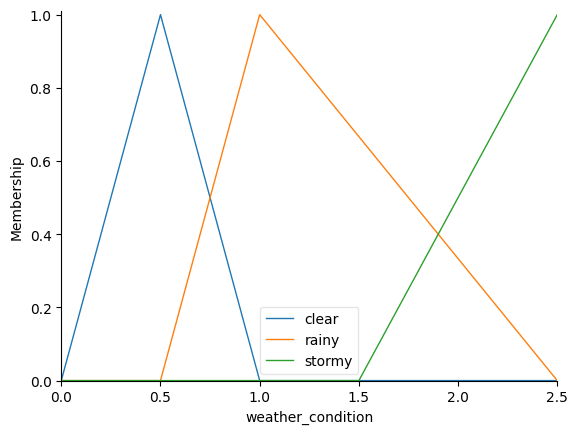

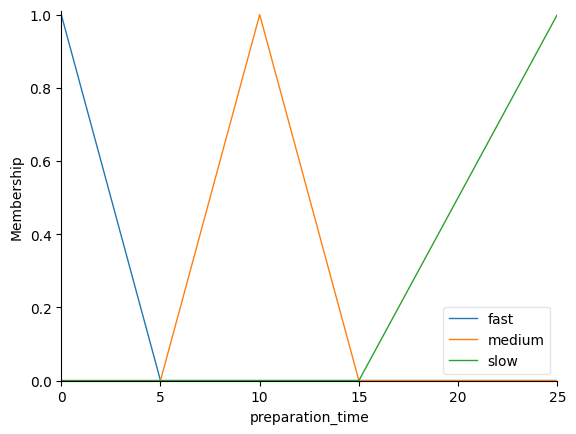

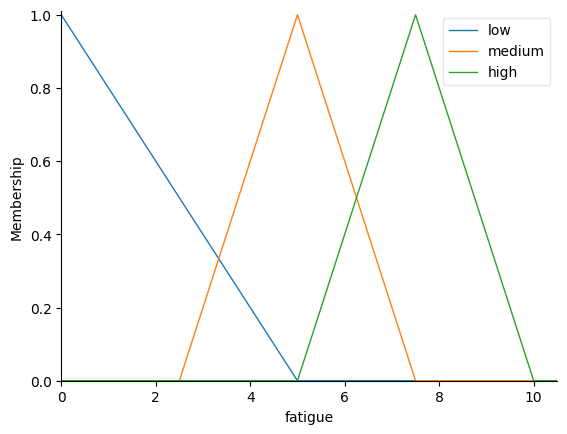

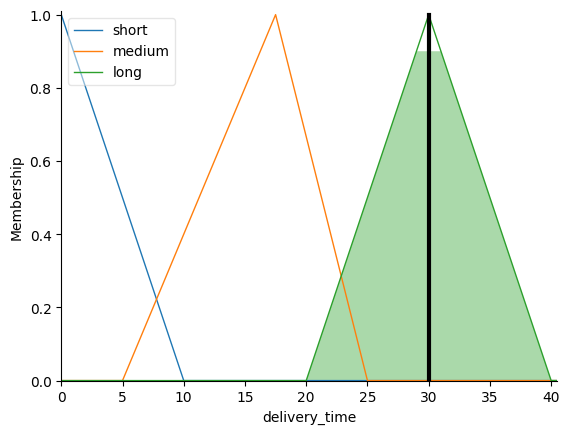

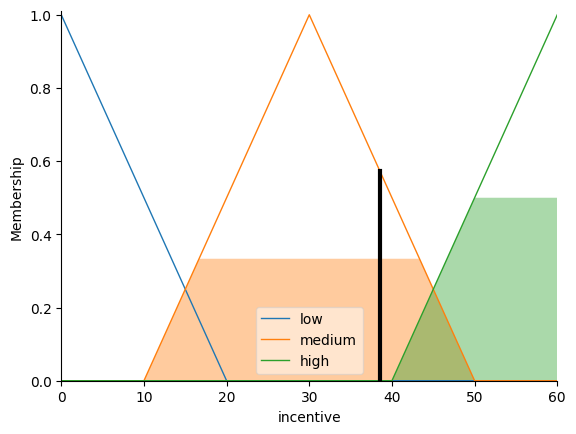

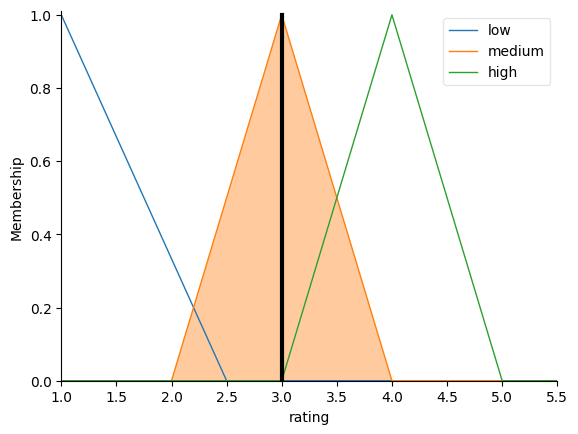

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
traffic_condition=ctrl.Antecedent(np.arange(0, 11, 1), 'traffic_condition')
distance=ctrl.Antecedent(np.arange(0, 16, 1), 'distance')
weather_condition=ctrl.Antecedent(np.arange(0, 3, 0.5), 'weather_condition')
preparation_time=ctrl.Antecedent(np.arange(0, 26, 1), 'preparation_time')
fatigue=ctrl.Antecedent(np.arange(0, 11, 0.5), 'fatigue')

delivery_time=ctrl.Consequent(np.arange(0, 41, 0.5), 'delivery_time')
incentive=ctrl.Consequent(np.arange(0, 61, 1), 'incentive')
rating=ctrl.Consequent(np.arange(1, 6, 0.5), 'rating')

traffic_condition['low']=fuzz.trimf(traffic_condition.universe, [0, 0, 5])
traffic_condition['medium']=fuzz.trimf(traffic_condition.universe, [0, 5, 10])
traffic_condition['high']=fuzz.trimf(traffic_condition.universe, [5, 10, 10])
distance['short']=fuzz.trimf(distance.universe, [0, 0, 3])
distance['medium']=fuzz.trimf(distance.universe, [2, 6, 8])
distance['long']=fuzz.trimf(distance.universe, [7, 15, 15])
weather_condition['clear']=fuzz.trimf(weather_condition.universe, [0, 0.5, 1])
weather_condition['rainy']=fuzz.trimf(weather_condition.universe, [0.5, 1, 2.5])
weather_condition['stormy']=fuzz.trimf(weather_condition.universe, [1.5, 2.5, 3])
preparation_time['fast']=fuzz.trimf(preparation_time.universe, [0, 0, 5])
preparation_time['medium']=fuzz.trimf(preparation_time.universe, [5, 10, 15])
preparation_time['slow']=fuzz.trimf(preparation_time.universe, [15, 25, 25])
fatigue['low']=fuzz.trimf(fatigue.universe, [0, 0, 5])
fatigue['medium']=fuzz.trimf(fatigue.universe, [2.5, 5, 7.5])
fatigue['high']=fuzz.trimf(fatigue.universe, [5, 7.5, 10])

delivery_time['short']=fuzz.trimf(delivery_time.universe, [0, 0, 10])
delivery_time['medium']=fuzz.trimf(delivery_time.universe, [5, 17.5, 25])
delivery_time['long']=fuzz.trimf(delivery_time.universe, [20, 30, 40])
incentive['low']=fuzz.trimf(incentive.universe, [0, 0, 20])
incentive['medium']=fuzz.trimf(incentive.universe, [10, 30, 50])
incentive['high']=fuzz.trimf(incentive.universe, [40, 60, 60])
rating['low']=fuzz.trimf(rating.universe, [1, 1, 2.5])
rating['medium']=fuzz.trimf(rating.universe, [2, 3, 4])
rating['high']=fuzz.trimf(rating.universe, [3, 4, 5])

traffic_condition.view()
distance.view()
weather_condition.view()
preparation_time.view()
fatigue.view()

rule1=ctrl.Rule(traffic_condition['low'] & distance['short'], delivery_time['short'])
rule2=ctrl.Rule(traffic_condition['medium'] & distance['medium'], delivery_time['medium'])
rule3=ctrl.Rule(traffic_condition['high'] & distance['long'], delivery_time['long'])

rule4=ctrl.Rule(weather_condition['clear'], incentive['low'])
rule5=ctrl.Rule(weather_condition['rainy'], incentive['medium'])
rule6=ctrl.Rule(weather_condition['stormy'], incentive['high'])

rule7=ctrl.Rule(preparation_time['fast'] & traffic_condition['low'], delivery_time['short'])
rule8=ctrl.Rule(preparation_time['medium'] & traffic_condition['medium'], delivery_time['medium'])
rule9=ctrl.Rule(preparation_time['slow'] & traffic_condition['high'], delivery_time['long'])

rule10=ctrl.Rule(fatigue['low'], rating['high'])
rule11=ctrl.Rule(fatigue['medium'], rating['medium'])
rule12=ctrl.Rule(fatigue['high'], rating['low'])

rule13=ctrl.Rule(distance['short'] & weather_condition['clear'] & traffic_condition['low'], (delivery_time['short'], incentive['low']))
rule14=ctrl.Rule(distance['medium'] & weather_condition['rainy'] & traffic_condition['medium'], (delivery_time['medium'], incentive['medium']))
rule15=ctrl.Rule(distance['long'] & weather_condition['stormy'] & traffic_condition['high'], (delivery_time['long'], incentive['high']))
rule16=ctrl.Rule(fatigue['high'] & traffic_condition['high'], (rating['low'], delivery_time['long']))
rule17=ctrl.Rule(fatigue['medium'] & traffic_condition['medium'], (rating['medium'], delivery_time['medium']))
rule18=ctrl.Rule(fatigue['low'] & traffic_condition['low'], (rating['high'], delivery_time['short']))

control_system=ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13, rule14, rule15 ,rule16, rule17, rule18])
fuzzy_system=ctrl.ControlSystemSimulation(control_system)
fuzzy_system.input['traffic_condition']=10
fuzzy_system.input['distance']=7
fuzzy_system.input['weather_condition']=2
fuzzy_system.input['preparation_time']=24
fuzzy_system.input['fatigue']=5
fuzzy_system.compute()
print("Thời gian dự kiến:", fuzzy_system.output['delivery_time'])
print("Tiền thưởng:", fuzzy_system.output['incentive'])
print("Đánh giá:", fuzzy_system.output['rating'])
delivery_time.view(sim=fuzzy_system)
incentive.view(sim=fuzzy_system)
rating.view(sim=fuzzy_system)

3.2673992673992673
2.3333333333333335


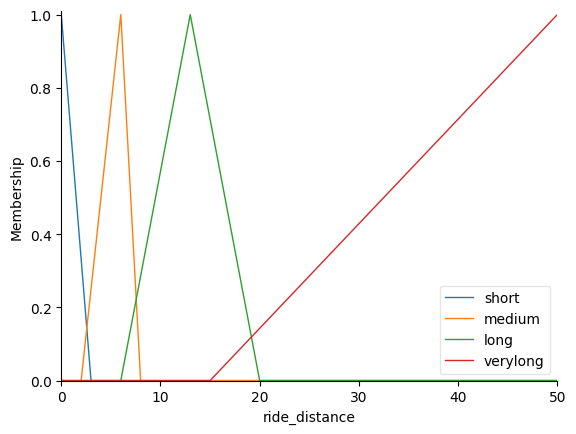

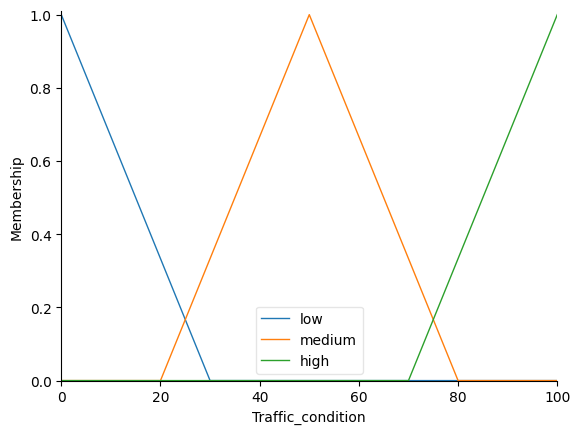

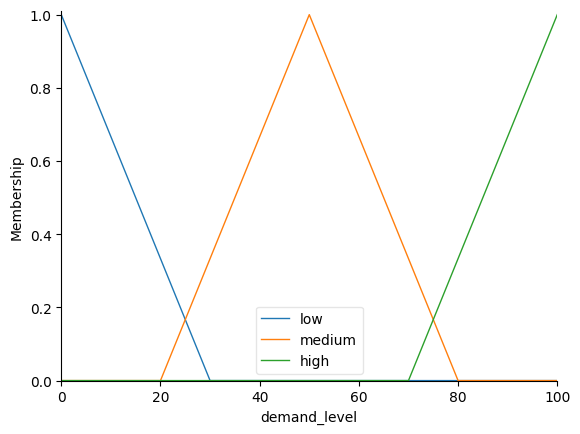

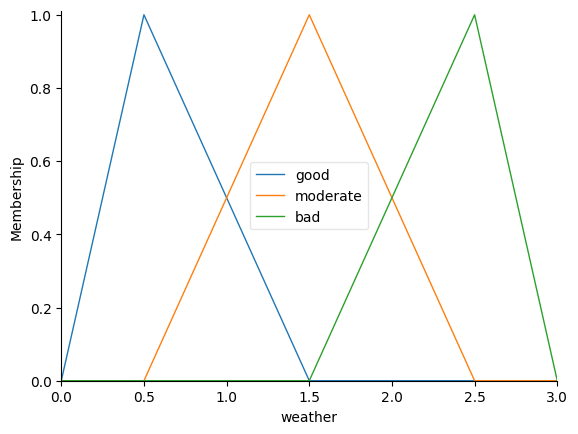

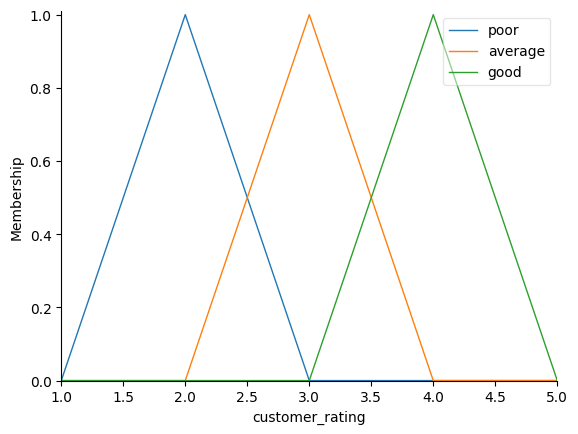

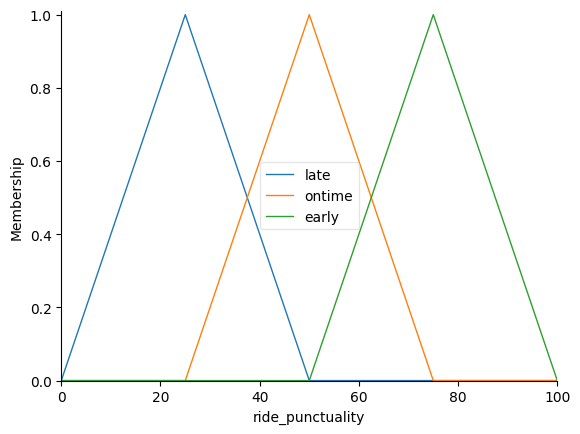

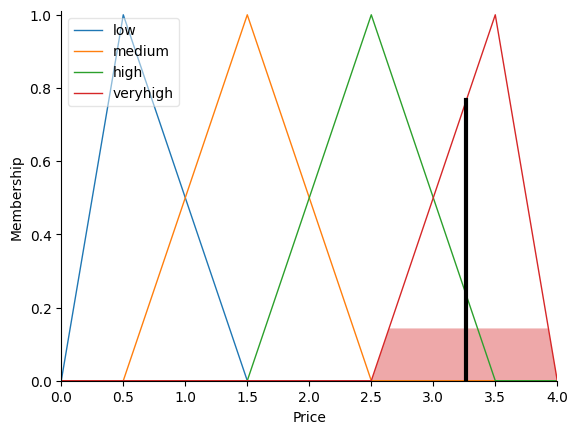

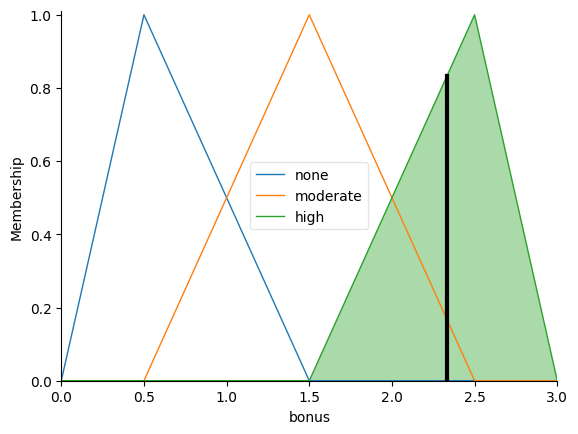

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

ride_distance=ctrl.Antecedent(np.arange(0, 51, 1), 'ride_distance')
Traffic_condition=ctrl.Antecedent(np.arange(0, 101, 1), 'Traffic_condition')
demand_level=ctrl.Antecedent(np.arange(0, 101, 1), 'demand_level')
weather=ctrl.Antecedent(np.arange(0, 3.1, 0.5), 'weather')
customer_rating=ctrl.Antecedent(np.arange(1, 5.1, 0.5), 'customer_rating')
ride_punctuality=ctrl.Antecedent(np.arange(0, 101, 1), 'ride_punctuality')
Price=ctrl.Consequent(np.arange(0, 4.1, 0.5), 'Price')
bonus=ctrl.Consequent(np.arange(0, 3.1, 0.5), 'bonus')

ride_distance['short']=fuzz.trimf(ride_distance.universe, [0, 0, 3])
ride_distance['medium']=fuzz.trimf(ride_distance.universe, [2, 6, 8])
ride_distance['long']=fuzz.trimf(ride_distance.universe, [6, 13, 20])
ride_distance['verylong']=fuzz.trimf(ride_distance.universe, [15, 50, 50])
Traffic_condition['low']=fuzz.trimf(Traffic_condition.universe, [0, 0, 30])
Traffic_condition['medium']=fuzz.trimf(Traffic_condition.universe, [20, 50, 80])
Traffic_condition['high']=fuzz.trimf(Traffic_condition.universe, [70, 100, 100])
demand_level['low']=fuzz.trimf(demand_level.universe, [0, 0, 30])
demand_level['medium']=fuzz.trimf(demand_level.universe, [20, 50, 80])
demand_level['high']=fuzz.trimf(demand_level.universe, [70, 100, 100])
weather['good']=fuzz.trimf(weather.universe, [0, 0.5, 1.5])
weather['moderate']=fuzz.trimf(weather.universe, [0.5, 1.5, 2.5])
weather['bad']=fuzz.trimf(weather.universe, [1.5, 2.5, 3])
customer_rating['poor']=fuzz.trimf(customer_rating.universe, [1, 2, 3])
customer_rating['average']=fuzz.trimf(customer_rating.universe, [2, 3, 4])
customer_rating['good']=fuzz.trimf(customer_rating.universe, [3, 4, 5])
ride_punctuality['late']=fuzz.trimf(ride_punctuality.universe, [0, 25, 50])
ride_punctuality['ontime']=fuzz.trimf(ride_punctuality.universe, [25, 50, 75])
ride_punctuality['early']=fuzz.trimf(ride_punctuality.universe, [50, 75, 100])
Price['low']=fuzz.trimf(Price.universe, [0, 0.5, 1.5])
Price['medium']=fuzz.trimf(Price.universe, [0.5, 1.5, 2.5])
Price['high']=fuzz.trimf(Price.universe, [1.5, 2.5, 3.5])
Price['veryhigh']=fuzz.trimf(Price.universe, [2.5, 3.5, 4])
bonus['none']=fuzz.trimf(bonus.universe, [0, 0.5, 1.5])
bonus['moderate']=fuzz.trimf(bonus.universe, [0.5, 1.5, 2.5])
bonus['high']=fuzz.trimf(bonus.universe, [1.5, 2.5, 3])

ride_distance.view()
Traffic_condition.view()
demand_level.view()
weather.view()
customer_rating.view()
ride_punctuality.view()

rule1=ctrl.Rule(ride_distance['short'] & Traffic_condition['low'] & demand_level['low'], Price['low'])
rule2=ctrl.Rule(ride_distance['short'] & Traffic_condition['medium'] & demand_level['high'], Price['medium'])
rule3=ctrl.Rule(ride_distance['medium'] & Traffic_condition['high'] & demand_level['high'], Price['high'])
rule4=ctrl.Rule(ride_distance['long'] & Traffic_condition['medium'] & weather['good'], Price['medium'])
rule5=ctrl.Rule(ride_distance['long'] & Traffic_condition['high'] & weather['bad'], Price['veryhigh'])
rule6=ctrl.Rule(ride_distance['verylong'] & Traffic_condition['high'] & demand_level['high'], Price['veryhigh'])
rule7=ctrl.Rule(ride_distance['medium'] & weather['bad'] & demand_level['low'], Price['medium'])
rule8=ctrl.Rule(ride_distance['short'] & weather['good'] & weather['bad'], Price['high'])
rule9=ctrl.Rule(ride_distance['verylong'] & weather['bad'], Price['veryhigh'])
rule10=ctrl.Rule(ride_distance['medium'] & Traffic_condition['medium'] & weather['moderate'], Price['medium'])
rule11=ctrl.Rule(customer_rating['good'] & ride_punctuality['early'], bonus['high'])
rule12=ctrl.Rule(customer_rating['average'] & ride_punctuality['ontime'], bonus['moderate'])
rule13=ctrl.Rule(customer_rating['poor'] & ride_punctuality['late'], bonus['none'])
rule14=ctrl.Rule(ride_distance['long'] & Traffic_condition['high'] & ride_punctuality['ontime'], bonus['high'])
rule15=ctrl.Rule(ride_distance['medium'] & Traffic_condition['medium'] & customer_rating['good'], bonus['moderate'])
rule16=ctrl.Rule(customer_rating['poor'] & ride_punctuality['late'], bonus['none'])
rule17=ctrl.Rule(ride_distance['verylong'] & weather['bad'] & customer_rating['good'], bonus['high'])
rule18=ctrl.Rule(ride_distance['short'] & customer_rating['average'] & ride_punctuality['ontime'], bonus['none'])
rule19=ctrl.Rule(ride_distance['long'] & Traffic_condition['high'] & ride_punctuality['late'], bonus['moderate'])
rule20=ctrl.Rule(ride_distance['medium'] & weather['moderate'] & customer_rating['good'], bonus['moderate'])

bonus_ctrl=ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13, rule14, rule15, rule16, rule17, rule18, rule19, rule20])
bonus_sim=ctrl.ControlSystemSimulation(bonus_ctrl)
bonus_sim.input['ride_distance']=20
bonus_sim.input['Traffic_condition']=50
bonus_sim.input['demand_level']=50
bonus_sim.input['weather']=2
bonus_sim.input['customer_rating']=4
bonus_sim.input['ride_punctuality']=75
bonus_sim.compute()
print(bonus_sim.output['Price'])
print(bonus_sim.output['bonus'])
Price.view(sim=bonus_sim)
bonus.view(sim=bonus_sim)

0.8


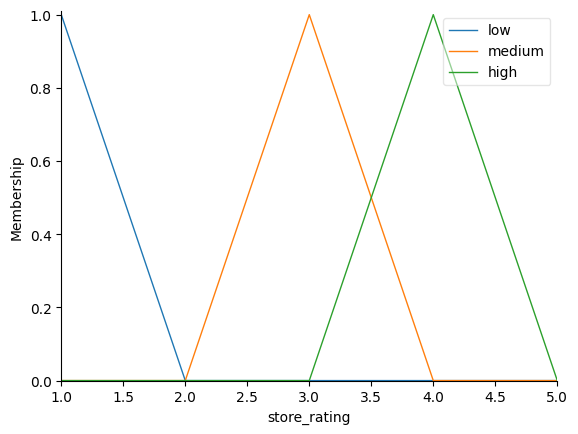

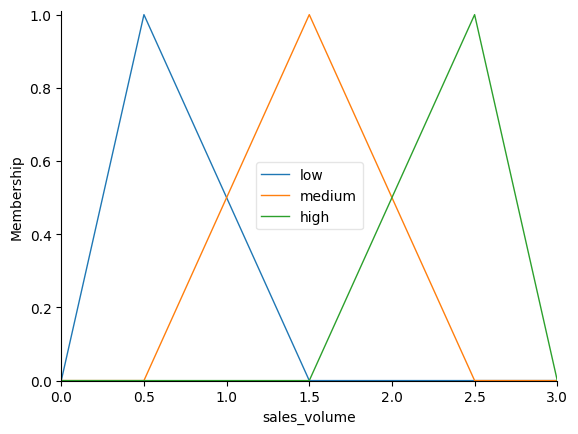

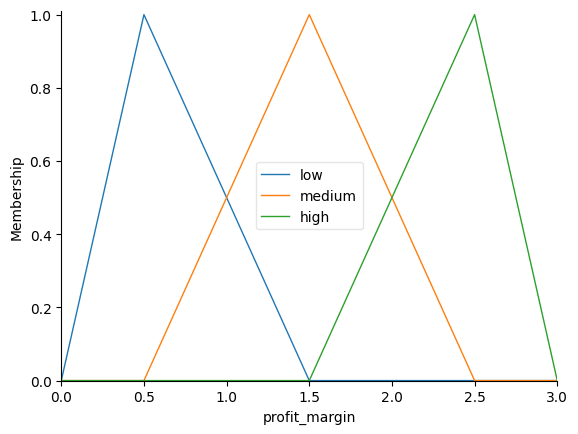

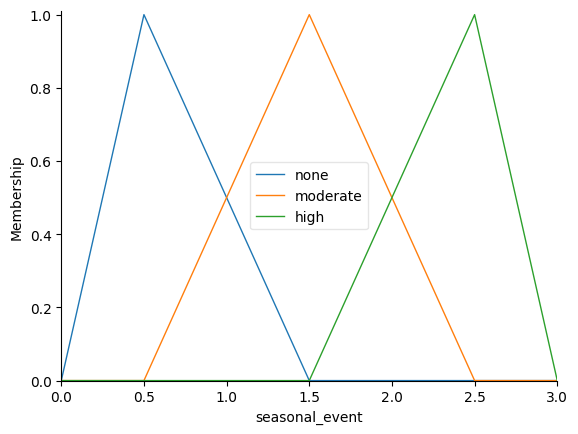

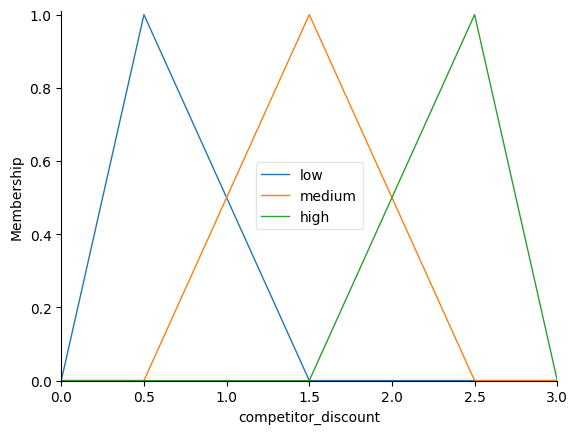

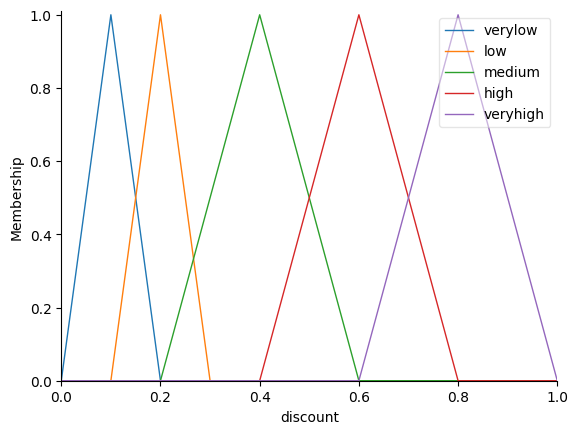

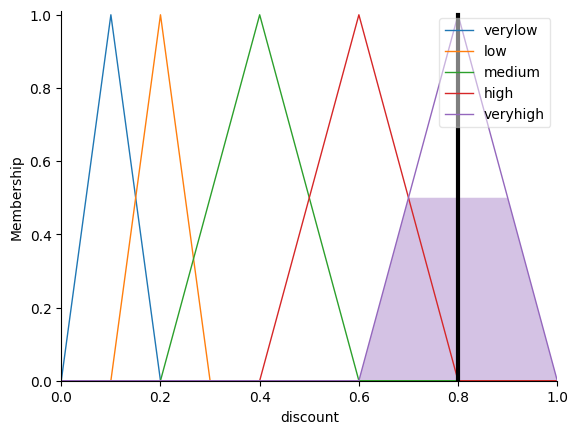

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

store_rating=ctrl.Antecedent(np.arange(1, 6, 1), 'store_rating')
sales_volume=ctrl.Antecedent(np.arange(0, 3.1, 0.5), 'sales_volume')
profit_margin=ctrl.Antecedent(np.arange(0, 3.1, 0.5), 'profit_margin')
seasonal_event=ctrl.Antecedent(np.arange(0, 3.1, 0.5), 'seasonal_event')
competitor_discount=ctrl.Antecedent(np.arange(0, 3.1, 0.5), 'competitor_discount')
discount=ctrl.Consequent(np.arange(0, 1.1, 0.1), 'discount')

store_rating['low']=fuzz.trimf(store_rating.universe, [1, 1, 2])
store_rating['medium']=fuzz.trimf(store_rating.universe, [2, 3, 4])
store_rating['high']=fuzz.trimf(store_rating.universe, [3, 4, 5])
sales_volume['low']=fuzz.trimf(sales_volume.universe, [0, 0.5, 1.5])
sales_volume['medium']=fuzz.trimf(sales_volume.universe, [0.5, 1.5, 2.5])
sales_volume['high']=fuzz.trimf(sales_volume.universe, [1.5, 2.5, 3])
profit_margin['low']=fuzz.trimf(profit_margin.universe, [0, 0.5, 1.5])
profit_margin['medium']=fuzz.trimf(profit_margin.universe, [0.5, 1.5, 2.5])
profit_margin['high']=fuzz.trimf(profit_margin.universe, [1.5, 2.5, 3])
seasonal_event['none']=fuzz.trimf(seasonal_event.universe, [0, 0.5, 1.5])
seasonal_event['moderate']=fuzz.trimf(seasonal_event.universe, [0.5, 1.5, 2.5])
seasonal_event['high']=fuzz.trimf(seasonal_event.universe, [1.5, 2.5, 3])
competitor_discount['low']=fuzz.trimf(competitor_discount.universe, [0, 0.5, 1.5])
competitor_discount['medium']=fuzz.trimf(competitor_discount.universe, [0.5, 1.5, 2.5])
competitor_discount['high']=fuzz.trimf(competitor_discount.universe, [1.5, 2.5, 3])
discount['verylow']=fuzz.trimf(discount.universe, [0, 0.1, 0.2])
discount['low']=fuzz.trimf(discount.universe, [0.1, 0.2, 0.3])
discount['medium']=fuzz.trimf(discount.universe, [0.2, 0.4, 0.6])
discount['high']=fuzz.trimf(discount.universe, [0.4, 0.6, 0.8])
discount['veryhigh']=fuzz.trimf(discount.universe, [0.6, 0.8, 1])

store_rating.view()
sales_volume.view()
profit_margin.view()
seasonal_event.view()
competitor_discount.view()
discount.view()

rule1=ctrl.Rule(store_rating['high'] & sales_volume['high'] & profit_margin['high'], discount['verylow'])
rule2=ctrl.Rule(store_rating['low'] & sales_volume['low'] & profit_margin['high'], discount['high'])
rule3=ctrl.Rule(seasonal_event['high'] & competitor_discount['high'], discount['veryhigh'])
rule4=ctrl.Rule(store_rating['medium'] & sales_volume['medium'] & profit_margin['medium'], discount['medium'])
rule5=ctrl.Rule(competitor_discount['low'] & profit_margin['low'] & sales_volume['high'], discount['verylow'])
rule6=ctrl.Rule(store_rating['low'] & seasonal_event['none'], discount['medium'])
rule7=ctrl.Rule(store_rating['low'] & profit_margin['low'], discount['veryhigh'])
rule8=ctrl.Rule(store_rating['medium'] & sales_volume['high'] & profit_margin['low'], discount['low'])
rule9=ctrl.Rule(store_rating['high'] & sales_volume['low'] & profit_margin['low'], discount['high'])
rule10=ctrl.Rule(store_rating['medium'] & sales_volume['low'] & profit_margin['high'], discount['medium'])
rule11=ctrl.Rule(store_rating['high'] & sales_volume['high'] & profit_margin['low'], discount['veryhigh'])
rule12=ctrl.Rule(store_rating['low'] & sales_volume['high'] & profit_margin['high'], discount['low'])
rule13=ctrl.Rule(store_rating['medium'] & sales_volume['medium'] & profit_margin['high'], discount['medium'])

store_discount_ctrl=ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13])
store_discount=ctrl.ControlSystemSimulation(store_discount_ctrl)
store_discount.input['store_rating']=4.3
store_discount.input['sales_volume']=2
store_discount.input['profit_margin']=1
store_discount.input['seasonal_event']=3
store_discount.input['competitor_discount']=3
store_discount.compute()
print(store_discount.output['discount'])
discount.view(sim=store_discount)

0.25


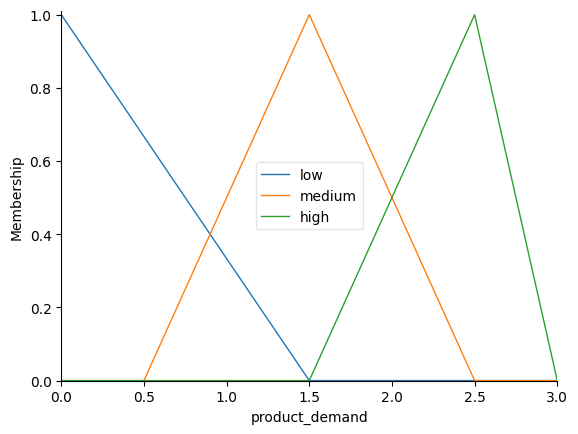

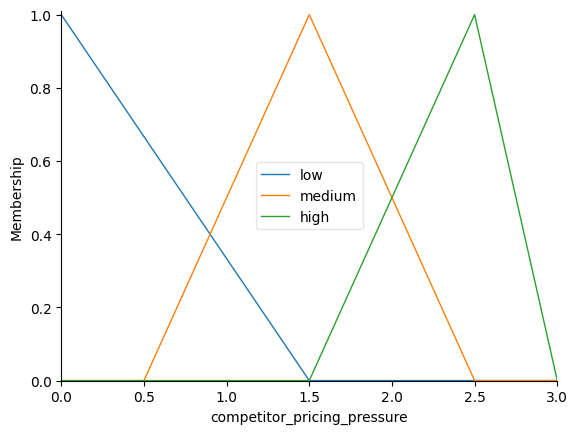

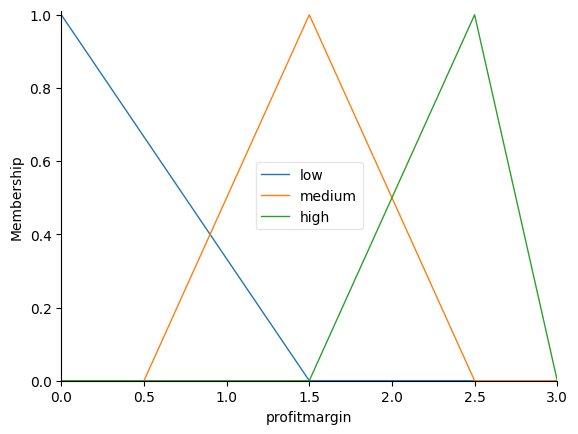

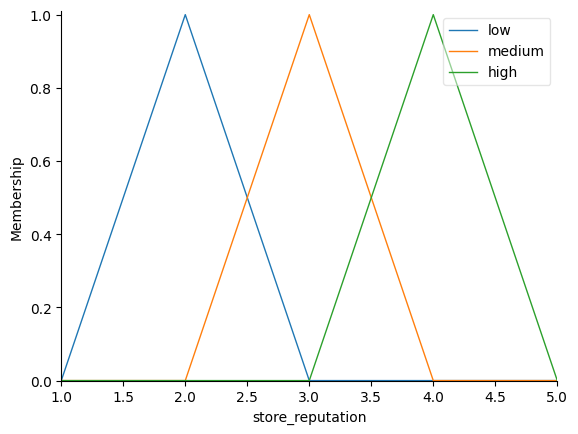

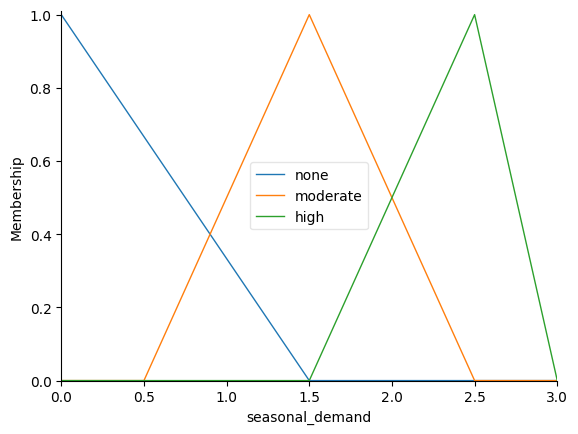

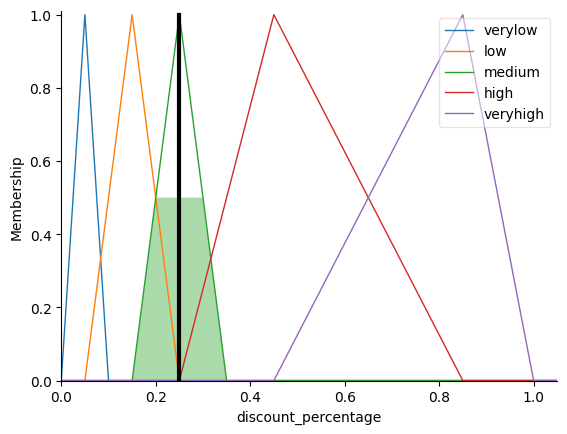

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

product_demand=ctrl.Antecedent(np.arange(0, 3.1, 0.5), 'product_demand')
competitor_pricing_pressure=ctrl.Antecedent(np.arange(0, 3.1, 0.5), 'competitor_pricing_pressure')
profitmargin=ctrl.Antecedent(np.arange(0, 3.1, 0.5), 'profitmargin')
store_reputation=ctrl.Antecedent(np.arange(1, 5.1, 0.1), 'store_reputation')
seasonal_demand=ctrl.Antecedent(np.arange(0, 3.1, 0.5), 'seasonal_demand')
discount_percentage=ctrl.Consequent(np.arange(0, 1.1, 0.05), 'discount_percentage')

product_demand['low']=fuzz.trimf(product_demand.universe, [0, 0, 1.5])
product_demand['medium']=fuzz.trimf(product_demand.universe, [0.5, 1.5, 2.5])
product_demand['high']=fuzz.trimf(product_demand.universe, [1.5, 2.5, 3])
competitor_pricing_pressure['low']=fuzz.trimf(competitor_pricing_pressure.universe, [0, 0, 1.5])
competitor_pricing_pressure['medium']=fuzz.trimf(competitor_pricing_pressure.universe, [0.5, 1.5, 2.5])
competitor_pricing_pressure['high']=fuzz.trimf(competitor_pricing_pressure.universe, [1.5, 2.5, 3])
profitmargin['low']=fuzz.trimf(profitmargin.universe, [0, 0, 1.5])
profitmargin['medium']=fuzz.trimf(profitmargin.universe, [0.5, 1.5, 2.5])
profitmargin['high']=fuzz.trimf(profitmargin.universe, [1.5, 2.5, 3])
store_reputation['low']=fuzz.trimf(store_reputation.universe, [1, 2, 3])
store_reputation['medium']=fuzz.trimf(store_reputation.universe, [2, 3, 4])
store_reputation['high']=fuzz.trimf(store_reputation.universe, [3, 4, 5])
seasonal_demand['none']=fuzz.trimf(seasonal_demand.universe, [0, 0, 1.5])
seasonal_demand['moderate']=fuzz.trimf(seasonal_demand.universe, [0.5, 1.5, 2.5])
seasonal_demand['high']=fuzz.trimf(seasonal_demand.universe, [1.5, 2.5, 3])
discount_percentage['verylow']=fuzz.trimf(discount_percentage.universe, [0, 0.05, 0.1])
discount_percentage['low']=fuzz.trimf(discount_percentage.universe, [0.05, 0.15, 0.25])
discount_percentage['medium']=fuzz.trimf(discount_percentage.universe, [0.15, 0.25, 0.35])
discount_percentage['high']=fuzz.trimf(discount_percentage.universe, [0.25, 0.45, 0.85])
discount_percentage['veryhigh']=fuzz.trimf(discount_percentage.universe, [0.45, 0.85, 1])

product_demand.view()
competitor_pricing_pressure.view()
profitmargin.view()
store_reputation.view()
seasonal_demand.view()

rule1=ctrl.Rule(product_demand['high'] & competitor_pricing_pressure['low'] & profitmargin['low'], discount_percentage['verylow'])
rule2=ctrl.Rule(product_demand['low'] & competitor_pricing_pressure['high'] & profitmargin['high'], discount_percentage['high'])
rule3=ctrl.Rule(seasonal_demand['high'] & store_reputation['high'] & profitmargin['medium'], discount_percentage['medium'])
rule4=ctrl.Rule(seasonal_demand['high'] & competitor_pricing_pressure['high'] & profitmargin['high'], discount_percentage['veryhigh'])
rule5=ctrl.Rule(product_demand['medium'] & competitor_pricing_pressure['medium'] & profitmargin['medium'], discount_percentage['medium'])
rule6=ctrl.Rule(store_reputation['low'] & product_demand['medium'] & profitmargin['low'], discount_percentage['medium'])
rule7=ctrl.Rule(product_demand['high'] & seasonal_demand['none'] & competitor_pricing_pressure['low'], discount_percentage['verylow'])
rule8=ctrl.Rule(profitmargin['high'] & competitor_pricing_pressure['medium'] & seasonal_demand['moderate'], discount_percentage['medium'])

final_discount_ctrl=ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8])
final_discount=ctrl.ControlSystemSimulation(final_discount_ctrl)
final_discount.input['product_demand']=2
final_discount.input['competitor_pricing_pressure']=1
final_discount.input['profitmargin']=2
final_discount.input['store_reputation']=4.2
final_discount.input['seasonal_demand']=3
final_discount.compute()
print(final_discount.output['discount_percentage'])
discount_percentage.view(sim=final_discount)

1.8088235294117645
1.1911764705882353


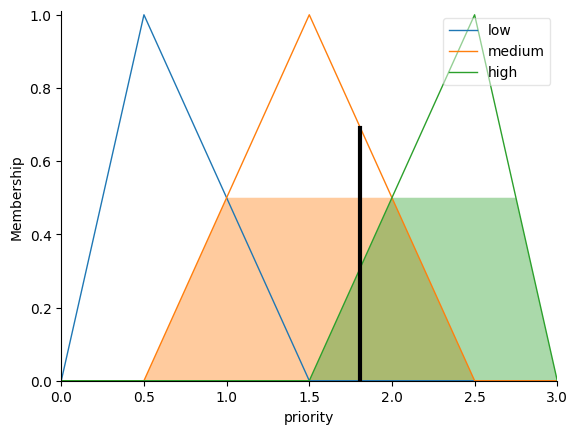

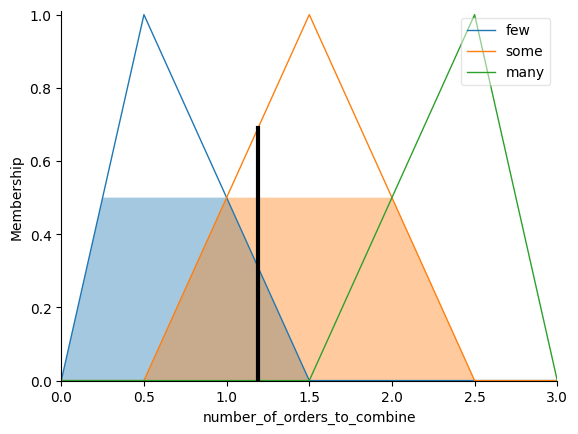

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

order_density=ctrl.Antecedent(np.arange(0, 3.1, 0.5), 'order_density')
delivery_urgency=ctrl.Antecedent(np.arange(0, 3.1, 0.5), 'delivery_urgency')
current_load=ctrl.Antecedent(np.arange(0, 3.1, 0.5), 'current_load')
Traffic_Conditions=ctrl.Antecedent(np.arange(0, 3.1, 0.5), 'Traffic_Conditions')
profit_per_delivery=ctrl.Antecedent(np.arange(0, 3.1, 0.5), 'profit_per_delivery')
number_of_orders_to_combine=ctrl.Consequent(np.arange(0, 3.1, 0.5), 'number_of_orders_to_combine')
priority=ctrl.Consequent(np.arange(0, 3.1, 0.5), 'priority')

order_density['low']=fuzz.trimf(order_density.universe, [0, 0.5, 1.5])
order_density['medium']=fuzz.trimf(order_density.universe, [0.5, 1.5, 2.5])
order_density['high']=fuzz.trimf(order_density.universe, [1.5, 2.5, 3])
delivery_urgency['low']=fuzz.trimf(delivery_urgency.universe, [0, 0.5, 1.5])
delivery_urgency['medium']=fuzz.trimf(delivery_urgency.universe, [0.5, 1.5, 2.5])
delivery_urgency['high']=fuzz.trimf(delivery_urgency.universe, [1.5, 2.5, 3])
current_load['low']=fuzz.trimf(current_load.universe, [0, 0.5, 1.5])
current_load['medium']=fuzz.trimf(current_load.universe, [0.5, 1.5, 2.5])
current_load['high']=fuzz.trimf(current_load.universe, [1.5, 2.5, 3])
Traffic_Conditions['low']=fuzz.trimf(Traffic_Conditions.universe, [0, 0.5, 1.5])
Traffic_Conditions['medium']=fuzz.trimf(Traffic_Conditions.universe, [0.5, 1.5, 2.5])
Traffic_Conditions['high']=fuzz.trimf(Traffic_Conditions.universe, [1.5, 2.5, 3])
profit_per_delivery['low']=fuzz.trimf(profit_per_delivery.universe, [0, 0.5, 1.5])
profit_per_delivery['medium']=fuzz.trimf(profit_per_delivery.universe, [0.5, 1.5, 2.5])
profit_per_delivery['high']=fuzz.trimf(profit_per_delivery.universe, [1.5, 2.5, 3])
number_of_orders_to_combine['few']=fuzz.trimf(number_of_orders_to_combine.universe, [0, 0.5, 1.5])
number_of_orders_to_combine['some']=fuzz.trimf(number_of_orders_to_combine.universe, [0.5, 1.5, 2.5])
number_of_orders_to_combine['many']=fuzz.trimf(number_of_orders_to_combine.universe, [1.5, 2.5, 3])
priority['low']=fuzz.trimf(priority.universe, [0, 0.5, 1.5])
priority['medium']=fuzz.trimf(priority.universe, [0.5, 1.5, 2.5])
priority['high']=fuzz.trimf(priority.universe, [1.5, 2.5, 3])

rule1=ctrl.Rule(order_density['high'] & current_load['low'] & Traffic_Conditions['low'], number_of_orders_to_combine['many'])
rule2=ctrl.Rule(order_density['medium'] & Traffic_Conditions['high'] & delivery_urgency['medium'], number_of_orders_to_combine['some'])
rule3=ctrl.Rule(order_density['high'] & current_load['high'] & profit_per_delivery['medium'], number_of_orders_to_combine['some'])
rule4=ctrl.Rule(order_density['low'] & delivery_urgency['high'] & Traffic_Conditions['medium'], number_of_orders_to_combine['few'])
rule5=ctrl.Rule(profit_per_delivery['high'] & current_load['high'] & Traffic_Conditions['high'], number_of_orders_to_combine['few'])
rule6=ctrl.Rule(delivery_urgency['high'] & profit_per_delivery['high'], priority['high'])
rule7=ctrl.Rule(delivery_urgency['medium'] & Traffic_Conditions['medium'], priority['medium'])
rule8=ctrl.Rule(order_density['low'] & current_load['high'] & profit_per_delivery['low'], priority['low'])

priority_ctrl=ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8])
priority_sim=ctrl.ControlSystemSimulation(priority_ctrl)
priority_sim.input['order_density']=2
priority_sim.input['delivery_urgency']=2
priority_sim.input['current_load']=2
priority_sim.input['Traffic_Conditions']=2
priority_sim.input['profit_per_delivery']=2
priority_sim.compute()
print(priority_sim.output['priority'])
print(priority_sim.output['number_of_orders_to_combine'])
priority.view(sim=priority_sim)
number_of_orders_to_combine.view(sim=priority_sim)